In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
#col = ['subject','expression']
key = pd.read_excel('keyword.xlsx')
key.head()

,Subject,Expression
0,Bank,My bank
1,Account number,My Account number
2,Birthday,My Birthday
3,Age,My Age
4,Email,My Email


In [3]:
colnames=['sentiment', 'timestamp', 'datetime', 'query','name','tweet'] 
df = pd.read_csv("sample_file.csv", error_bad_lines=False,encoding='ISO-8859-1', names=colnames, header=None)
df = df.drop(columns=['query','sentiment','datetime','timestamp'])
df.head()

,name,tweet
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,scotthamilton,is upset that he can't update his Facebook by ...
2,mattycus,@Kenichan I dived many times for the ball. Man...
3,ElleCTF,my whole body feels itchy and like its on fire
4,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = pd.read_csv('train.csv')
df.head()

,name,tweet
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,scotthamilton,is upset that he can't update his Facebook by ...
2,mattycus,@Kenichan I dived many times for the ball. Man...
3,ElleCTF,my whole body feels itchy and like its on fire
4,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df['tweet'][226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [6]:
df.shape

(1600000, 2)

In [7]:
df.tail()

,name,tweet
1599995,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# Data Preprocessing

##  HTML decoding

In [8]:
df.tweet[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [9]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.tweet[279], 'lxml')
print (example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


## remove @mention

In [10]:
df.tweet[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [11]:
re.sub(r'@[A-Za-z0-9]+','',df.tweet[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

## RemoveURL links

In [12]:
df.tweet[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [13]:
re.sub('https?://[A-Za-z0-9./]+','',df.tweet[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

## Remove non-ASCII character

In [14]:
df.tweet[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [15]:
testing = df.tweet[226]

In [16]:
''.join([i if ord(i) < 128 else ' ' for i in testing])

'Tuesday   ll start with reflection    n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

## Remove Hashtag

In [17]:
df['tweet'][175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [18]:
re.sub("[^a-zA-Z]", " ", df.tweet[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [19]:
re.sub(r'(\s)#\w+', r'\1', df['tweet'][175])

"@machineplay I'm so sorry you're having to go through this. Again.  "

# Preprocessing on all tweets

In [20]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup

tok = WordPunctTokenizer()

In [21]:
at_rate = r'@[A-Za-z0-9]+'
url_link = r'https?://[A-Za-z0-9./]+'
combine = r'|'.join((at_rate, url_link))

def preprosessing(text):
    soup = BeautifulSoup(text, 'lxml')
    new_text = soup.get_text()
    strip_text = re.sub(combine, '', new_text)
    try:
        clean = ''.join([i if ord(i) < 128 else ' ' for i in strip_text])
    except:
        clean = strip_text
    lower_case = clean.lower()
    
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.tweet[:100]

In [23]:
test_result = []
for i in testing:
    test_result.append(preprosessing(i))

In [24]:
df['processed_tweet'] = df['tweet'].apply(preprosessing)

In [25]:
df.head()

,name,tweet,processed_tweet
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww , that ' s a bummer . you shoulda got d..."
1,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can ' t update his facebook b...
2,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball . managed to s...
3,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,Karoli,"@nationwideclass no, it's not behaving at all....","no , it ' s not behaving at all . i ' m mad . ..."


In [123]:
# creating a empty dataframe with columns name

count_df = pd.DataFrame(columns=['Subject',"Count"])
count_df

,Subject,Count


## 1.Email 

In [124]:
df['PPI count'] = 0
count = 0
for row_no,tweet in enumerate(df['tweet']):
    #if (j[0] != '@'):
    #if (not(j.startswith("http"))) and (j[0] != '@'):
    if re.findall("[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+",tweet):
        print(row_no,tweet)
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count)  
count_df.loc[0] = ["Email",count]


4054 I want a new laptop.  HP TX2000 is the bomb. :| Who knows how much it is? IM me: gabbehhramos@yahoo.com
7917 who stole elledell@gmail.com?  
8496 @alexistehpom  really? did you send out all the info already? if you did..maybe you could just email me stuff missataari@gmail.com
10290 @LaureyStack awh...that's kinda sad  lol add me?? hello.kitty.65@hotmail.com
16413 @jilliancyork  got 2 bottom of it, human error  bug from a release last month, being fixed tonight.  Email press@linkedin.com for details
61735 Sumthin, u noe how sum girls are lyk an hourglass or pear?...im a coconut tree  not cool dude lol &lt;:-&amp;83w@r3...:-&amp;&gt;
65407 @suzesinc, RB ...Run out of ya allocated props  need to RB for@dickadcock@bendrix@Corts@StarCrazy  @2fast4u@s... ? http://blip.fm/~5igvc
72386 MaDonnaFae ok, i found this on a fluff page~ email   nrqj8ga@facebook.com   if your acc has been disabled.Your completly gone from fb  x
74295 @lovetoblog I can't DM you my email cos you're not following me

601176 @MAGICJUANELDURO No I don't. Lost my cell  so dm me ur # or vrpublicity@gmail.com...u leave today? wld love to talk b4 u go...or via mail
601836 Really, really frustrated. Please divert all emails to kiyuns.admin@gmail.com. Many unreplied emails! Pls bear with me for abit 
605976 is not a happy bunny today  iloveyouu@KookieLovesSk... xoxo
606006 If anyone has PRAYERS PLAINLY SPOKEN, I'd be grateful for copy of prayer re:watery graves; Can't find my bk  jonathan@sthelenas-boerne.org
607308 @bernadettedoyle suzanne@helpmorepeople.com  MY DM isn't working! 
612205 forgot cell ph @ home today &amp; has no idea what happened to her lunch date  CC check e-mail for LinkedIn invite or e-mail cewinch@aep.com
614252 trying to startmy e mail account info@mobile-laibspeise.de    does not work 
620564 I tried everything. I emailed support@twitter.com no answer yet  @colorfeelings
629682 hmmmmm daniel is eating. sounds funnnnnnn!  uugghh  hmm my tummy kills. danil, e mail me at gabby.2233@hot

858348 Buy 2 and get 1 free! On my website! Just email your choices to Marla@BisqueBeadSupply.com   Now till April 30th!
860560 Willing sponsors can contact me at www.jklawitter@mybigplanet.com. Many thanks to you all who give from the heart! 
861549 @BradshawPhotogr  seems i always end up at tx schl!  email lori@nordstromphoto.com  i'll add u to mail list 
863367 @rohanbisset Hi, I am a creative web designer and would love to work on your project, you can contact me at kumailht@gmail.com 
863381 @kevinm00re Hi, I am a creative web designer and would love to work on your project, you can contact me at kumailht@gmail.com 
863438 @commercialdeals Hi, I am a creative web designer and would love to work on your project, you can contact me at kumailht@gmail.com 
867141 dleightonmarissa Hi leighton, how can I read your blog? my google address is louisemurph@gmail.com  thank you
873303 here trying to now nw people add me!  meilay_3021@hotmail.com 
876215 @epiphanygirl i DM'd you girl. You can

1007383 @chin80 Please do send a note to pinstorm.research@gmail.com if you'd like to be considered 
1014451 @jakeisonline just drop us a mail at hello@litmusapp.com and we can pass it around the team! Thanks 
1016472 @MooeyAndFriends hehe cool  give me an email moonbeamstarlight@hotmail.co.uk x
1018711 @thebluey queens@vaiprocurarsuaturma.com.br 
1021359 Want to purchase your Pagan Night Out tickets early??  Paypal is your friend!!  Contact us at savannahpaganpride@yaho.com and ask us how 
1021653 @alpowell07 send me an email on tannice@campoeticlicense.com and we can come to some kind of agreement 
1023380 @bscopes  Hey Steve feel free to shoot me an email with any questions you have about copy..cori@writesyntax.com 
1023797 @hottieann3376  add me at wanna_have.fun@hotmail.com  wink*
1025687 @nicksantino I heart Phantom Planet!! Tht 'record' is so awesome. &amp; about those shirts@hottopic..LMAO. Id buy 10 
1026813 @TroublePandaPR Having a contest for free life coaching. Please email

1168059 lookin for green sponsor for this upcoming wed' green giveaway contest--  dm me or email info@greengiveawaycontest.com
1169335 add niu facebook acct. ko . kh3mb0t_O8@yahoo.com ung eadd  http://plurk.com/p/xejz4
1170044 @jeffarchuleta Good morning. Does David have any official fan email address? Is theofficialarchuleta@yahoo.com an affiliated one? Ty 
1170189 @jeffarchuleta Good morning. Does David have any official fan email address? Is theofficialarchuleta@yahoo.com an affiliated one? Ty 
1171622 @carguev hey!  i just replied to your message. haha of course i'm interested!  just send it to me. nisa_rigets@yahoo.com. )
1172548 @Sims3Website Sure! Send an email with the banner for contato@sims3maniacos.net 
1173878 @glitteryglossy hmmm...let's talk. send me a note carrotattache@yestocarrots.com 
1174724 @roseisroadkill sure! i wouldn't mind..  it's annabelledestiny@hotmail.com
1180347 @trimurls my Custom URL doesn't work. is it my fault or is there something fishy on your side? 

1284746 Maita: Looking for girls who love giving advice! Email me your contact number, age and name to beinTG@totalgirl.com.ph 
1285132 @ctolsen thanks for sharing your good Zendesk karma  Please send your t-shirt size and postal address to michael.hansen@zendesk.com
1285505 @snyipi WAKAKAKA pantes ujan, EH TAU DEH YANG BARU GANTI JAVELIN haha -_- @dharmest adaada hsnaa_040807@hotmail.com add ya hihi thanks 
1285606 @MYNTMag send me your email and ill send you the music beatzboyproductionsllc@gmail.com.....thank you...and i got you 
1285664 @ctolsen you are lucky and get a very limited edition Zendesk Buddha Machine  Please send postal address to michael.hansen@zendesk.com
1286706 @thematthellyer freddie@frenzyfrenzy.com thanks 
1286767 Maita @Inanic I don't think you should,please send it tellTG@totalgirl.com.ph 
1287116 Burn the Negative T shirt comp. mail matt@gung-horecordings.com with the album name of BTN and your t shirt size. 1st 3 are winners. 
1287458 @Adillaksndra yeayyyy gp

1411457 @BaysWonderGirl yup   juss DM names or email me @ willewill510@gmail.com
1417834 @MissNolcha we already know each other.  www.annacastillo.com!   If you would like to be a guest on our show email aycastillo15@aol.com
1419647 demilovato_mexican_fans@hotmail.com thanks for the support to @ddlovato MEXICAN FANS LOVE HER 
1419672 dre_abb_video aint nothin@l...glad the sun came out 
1422645 @polydramatica sweeeet! you can send me your address to my email HiEisWiffEE07@yahoo.com  or I'll send mine to you!
1425984 @iamthemuse you can email me at spritetwig@msn.com and I can mail you some pics and prices 
1426685 @enrikeekee add me xvickyx_09@hotmail.com I deleted you on accident, instead of putting end convo I clicked delete contact SORRY 
1430415 @AdrienneTeri should catch me on msn, aidan_dcc@hotmail.com  have you been enjoyying the fantastic weather?  x
1431058 Sorry.@tractahpull.. I ate them all up 
1432681 @ohboom andreita_princes_pink@hotmail.com 
1437211 @TinyKsass Haha Thanks 

1590489 @ClericAaron Yes, lbruton@tulsalanparty.com is a good start. But I think you have that already 
1591675 @miss_ellen Good morning!!!!   Congrats!    send me a note... jill@q985fm.com
1599053 @thejoshlynn You are! BTW send me an email. Want to do that &quot;non-wedding&quot; meetup to talk about ideas  marni@creativecustomcardboxes.com
584


In [27]:
df.head()

,name,tweet,processed_tweet,PPI count
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww , that ' s a bummer . you shoulda got d...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can ' t update his facebook b...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball . managed to s...,0
3,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....","no , it ' s not behaving at all . i ' m mad . ...",0


In [28]:
df['PPI count'].unique()

array([0, 1])

## 2,3,4,5-Sexuality

In [126]:
#df['PPI count'] = 0
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?: gay | transgender | lesbian | homophobic )",tweet)):
        print(row_no,tweet)
        print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count)
count_df.loc[1] = ["Sexuality",count]

237 i want tacos and margarhitas telll gay i say hello < 3
0
3037 dramaa assignmenting is gay . too sick but i have to do it
0
3698 bloody idiot !! just shop him into some gay porn
0
4732 is soo bored and i just wanna go out and have some fun but thandis at some gay thing all day
0
6502 going to have a lovely day at court pleaseee go easy on me judge ! i ' m just a sacred little gay boy
0
9612 my friend says ur gay stupid jonas brothers
0
10565 fucking can ' t go to gay prom so i ' m gonna chill at home , work on prolenet . org
0
11489 have to go to work soon , first time in 3 months !!! fucking gay !!!
0
13328 trying not to cry ... my haiir ! that stupid gay ruin it ! dont ever go to eduardo franco !!! ever !
0
16900 it ' s gay pride and didnt go
0
16995 cause i woke up early and i have nothing to do im watching gay twilight and now im gonna watch xmen 2 ahaha
0
17314 gay gay gay i wana c demi but chi concert in on shabbat and everywhere else shes goin is liek 5 hours awayyyy gayyyy
0

92637 _real_shaq : where are all the black successful single men ? seems like their all gay or white women obessed
0
92821 now i must do homework im pretty gay , i get back form school and then i do homework ...
0
92955 so why was shane dawson ' s video flagged ..? so gay . i didn ' t get to see it
0
93268 oh no ! now we cant text twitter when we ' re out together and be all gay .... so sad
0
93675 stop messing with the dumb ones ... they ruin it for the good ones ... thats why amercia be all lesbian now lol ... dumb dudes
0
94264 u probably have the right number my phone is being gay .. its not letting me call or text .. so i will get it eventually ..
0
94988 twitter iz gay n confusing :'(
0
95809 what the hell san antonio ! im leaving in 3 weeks and now .. now u wanna open a gay club in the south side !!! ur killing me ! ugh im so sad
0
95836 uhm but that would make u gay wouldn ' t it ?? i don ' t want u 2 b gay
0
95944 sogayyyyyy , still cant change dis frickin gay background
0
964

173941 ' whats your stand on gay marriage ?' - me . ' what the fuck natalie , stop asking me these gay ass questions ! go get a job !' - dad .
0
175566 do i really look like the gay guy with the dark hair and sleeve from # bgt dreambears ?
0
177462 it is gay ... u have dissappointed me that past few days
0
179312 " jake cologne " from hollister makes every girl i hug go fucking nuts . too bad i ' m gay .
0
179547 a reply from would make my life , he replies usually to the people who call him gay , then he tells them he willblok them
0
180684 going to travis burkes house in bfe ! gay !
0
183959 considering he should appreciate " family "... i luv my gay men , don ' t get me wrong , but smetimes they don ' t approve of us screw em !
0
185781 knowing that you think guyliner is too gay for me - makes me < 3 you so much more ! have fun tonight - im jealous
0
186775 i ' m in love with but he ' s gay i wish he would go straight and b with me ...
0
187806 this shit is gay i have no friends ..


265979 i ' m sooo disappointed . no gay cartoons .
0
266319 drew told me that robert pattinson ( edward cullen ) is gay . is this true ?
0
266436 watching so gay thing
0
267559 man these niggas is wack .. how u fall asleep @ 12 : 45 !.. they gay .. somebody tlk 2 me ... lol
0
267941 my gay man shoes gave me blisters
0
268816 phone isnt sending text being gay i got all yours though better tell me hold it works tomorrow
0
271059 ahh sorry to hear hugs headed your way whats up other then normal gay guy lonelyness
0
272275 awh !!! i had a picture and idk what happened to it twitter is gay i hate you
0
272813 i hate that twitter only allows 140 characters gay !
0
273830 hating life at the moment ...... boys are gay and stupid stay away from them
0
275694 shes gay i hate em all at the office .
0
278701 snap ! how gay is it .. a tad cal
0
280427 i asked the same question ! i uploaded a new one and now i don ' t have one twitter is gay .
0
284195 that soup made cup - a - soup look digestible !

366304 good job i ' m not a gay black immigrant with an asbo , i ' d be hounded out of doncaster in a shot thanks to our towns voting cock - up
0
367160 i just feel bad for sacha ... he practically got publically gay bashed ..
0
368122 large , your picture is adorable . small , it reminds me of the facebook pic of a homophobic ex co - worker of mine !
0
368249 oh , i think we can all imagine the support a stereotypical lesbian would get from fandom ...* crickets chirp *
0
368336 aww gay , i only have 1 phone
0
370391 thanking paul that he doesn ' t live in virgina park , haha . drinking with some random ' s , wishing the guy in the corner was gay !
0
371013 i kinda my old gay buds that for whateva reason i don ' t chill wit no more .
0
373467 just got home from work , now staying up till who knows doing this gay research paper
0
374206 i ' m enjoying gay days without you !! and i ' m not even a lesbian !! i miss you
0
374732 how come everyone i wanna marry is a lesbian ? i still love y

439955 tired of gay drama , its just weird when i couldnt care less abt tyler or brandon so why are you still here ?! lol i miss my boyfriend
0
441153 i think the youtube on my g1 is homophobic ! it force closes on the vids i wana c ! still haven ' t seen the spec responce vid
0
442849 off the the march of dimes ! sorry gay pride
0
444087 is crying because kayles is leaving . i shall miss you my little lesbian friend
0
444500 ghey english . gay candyman . im so tired !
0
445158 _bass i wish you werent gay .
0
446600 wow ... i go on about musicals more than my gay man .... i miss him
0
449958 playn xbox but wishing the internet wasn ' t bn gay so i could play xbox live
0
450114 same i need to find the gay fairy .
0
450479 hahah i love it 2 jus caught the end he is but sarah michelle gellar wud get it too lol i ' m not gay either
0
451407 8 degrees .. am so cold i might be totally gay this winter and wear gloves
0
451635 i hate being gay as i can ' t enjoy the hot men , no - one talks ab

536066 thats gay , why dont you love me
0
536746 moxies ! haha . soo gay there gaaah !
0
536997 _jelly im working saturday night and sunday too . gay @ work !! what kinda meeting ?
0
538334 omg gay guy messed up my hairs !!!
0
539098 kunta : biotch i have 2 work thee stand @ pride gay festival on saturday no san jo !
0
539669 damn i wish i thought of something gay like this .. i culd have been a millionaire .
0
540390 ocd attack this is gay .
0
543272 ricky is so gay he is gonna move !! fuck you asshole !!
0
545512 ughh twitter is being uber gay lately to me
0
546703 oohhh goooddd ... she went gay for ratings ? damn the recession must have got to her before good dick did ...
0
546751 oh and tell him to stop being gay and reply to my text hes making me sad .
0
546873 i hate taking pills ugh , it ' s gay . i caught a cold out here
0
547704 i really give up on men . they say they want a good woman but they all like loose pussy hoes ! i ' m going lesbian .
0
549014 may may is gay and is le

632794 hates homophobic obama work was fun , but i think i have the highest iq out of everyone i work with . blah , pay is pay right ?
0
633029 ahhhhh friend from earlier in life ... totally a lesbian .... totally has a crush on me !!!! ahhhh ! sweet but i ' m taken
0
633080 what ' s wrong w / gay guys
0
634879 _the_brat sorry , my phone is being super gay ! i missed the 4th of july weekend . i wanted to take my mom and lani . booo !
0
635504 omfg . school closed coz of swine flu . gay thing
0
638310 ohh shiiit !! i just realized .... pride is next weekend !! weeeeee !!! too bad 98 % of my gay friends will be in colorado ....
0
639083 lo gay ! where did you go ?!
0
639412 i miss you ............................................. was that too gay ?
0
640321 is sad that today he has to say good bye to his crazy gay but very faithful dog
0
640344 last day in bangkok ... i have gay ass english assignment to do
0
641110 i now know what it feels like to not be liked for being gay . i ' d neve

729512 i ' m a bad gay n have never seen it . i ' ll come over n we can watch it together .
0
730851 my fxxking future husband is ... not straight ! like what the hell ?! why are all the cute ones gay ?!
0
731129 me to !! and all the old songs like gnight & goodby this is gay gay gay only frikn 18 songs
0
731387 i got a new bag today with the xmen team on it with mohawks . it rocks . phoenix looks like a punk butch lesbian . i have a sore throat .
0
732079 thursday is the gay pride parade in jerusalem and i can ' t make it ... again .
0
733388 we didn ' t end up getting it because tommy was being gay but the gig was amazing ! so it made up for it :')
0
733564 just got home from malling ... i saw this very hot gay couple .. wish i had one to share my day with ...
0
734273 toms moving back to arran tomorrow gay .
0
734588 historyyyy is gay gay gayyy
0
735623 i hate you brain big stupid gay dream . blaaaaah .
0
737437 i thought you knew , i put it on twitter :') we didn ' t even get it co

836288 keep your normal piccy then , it is sehr hot = p ( not in a gay way ) haa
0
836940 at a gay church in portland with amber pie ! ~* kittie *~
0
838005 herrrros my special gay friend
0
838216 going to the kingston mall with some ugly girls & gay boys < 333333
0
838481 is enjoying london although already bored with the gay jokes .
0
841760 pants monday again never a good thing and my first 5 day week for a while oh well only 10 working days until my big gay day
0
842357 what ' s wrong with gays ??? my mums gay !! n i love her to bits ... it doesn ' t change a person ... are r for or against ??
0
843061 ah seth mcfarland ... please come out as a pot smoking gay slut honey that ur . the last episode was over the pot ! oh ... and be my daddy .
0
843194 lol aw but then it ' d be gay pron
0
843992 _on_fire nice line . i ' ll definitely add that line to my bit on how gay persian men are .
0
844332 aww thanks . and hah ! on the gay part ..
0
845063 wow ! it might take some time to adopt c

948356 your too gay juanchochi lmao
0
948967 wow ! that ' s impressive , not surprised you ' re hot ( in a non - lesbian way )
0
949640 had a good night . fuck you dumb bitch and your lesbian clown .
0
949903 morrissey ' s backdrop was a big muscley sailor , nearly as gay as the whole of eurovision ! am i let off too ?
0
950246 i took the r u gay test ... lol m straight . yess ik i m
0
950526 thrashed ! againn =( & by carlton !! mega gay ! i will blast music and clean my room
0
951376 no no , not offended at all . i thought you really were taking a lesbian to your dance . i was saying " right on !"
0
952995 emilys was sick . had an epic night gay work now .
0
954616 greece ' s contestant looks like he should be on top of a table in a gay bar rather than on stage . no offence to any greeks , but he does .
0
955894 and his hair . i wonder would he send some sperm my way ? please ! i wanna have a ginger kid with a gay dad who has a really good pop voice !
0
956216 omg . gay laptop isn ' t

1053156 silver lining : this will put him back on the right side , because he already would have turned over after n . h . approved gay marriage .
0
1056264 openly gay teen voted prom queen at la high school you go .. uh . girl
0
1056570 this is awesome . " openly gay teen voted prom queen at la high school ":
0
1057585 awhh i just passed the cutest gay couple ever
0
1058880 ready for the gay club . can ' t wait
0
1059742 twitter is gay !
0
1062780 _benson i have to ask : is it dirty , lesbian witchcraft ?
0
1062992 _xxx yup we have a lil gay park down there x
0
1063735 stickams being gay soooo .... your a cutie ; d and i love your videos (: i hope you have time to say hi
0
1063997 your gay !
0
1065630 fishsticks + me = gay fish
0
1068004 lets turn this weather around & go have some fun all gay .
0
1068493 you don ' t have a real reason to think they are gay ? your just mad that taking back sunday is better than you ...
0
1068682 off to bed now off to " meet the parents " tomorrow !!! 

1158962 yeah but .. your gay . i could flog anyone at guitar hero . i ' m pro .
0
1160271 _x haha , gay ! lol , so wuu2 today ? i ' ve just been to the beach
0
1161524 just finished my end of the year history essay on a current event . i chose .... gay rights fuck yah
0
1161902 i think i found the most flamboyant gay guy in the world . i want him to be my friend .
0
1162636 _ what exactly is cold gay beer ?
0
1162834 hoping i can get through tomorrow without hearing the words gay marriage , rush limbaugh and / or economic collapse
0
1163507 ok sorry read and bedford but im on my ph and twitter is being gay . im very excitdd though . read ure coming in mine and bedfords room
0
1165159 yeah ... no thankyou , im not gay !
0
1166306 i ' ve cleaned up the house for my mummy awwwww how gay . doug xx
0
1168093 he looked so gay in that ad , i think i already saw that too ..
0
1169441 " nothing gay about a gay wedding " k sz , enbom k nagyon tudnak .
0
1171105 the love of siam is a great great 

1265890 dick cheney is suddenly pro - gay marriage ... even though it ' s not a joke it still cracks me up
0
1267362 : oh , i know . i meant it was quick that went from " what dvd should i watch ?" to " drunk gay porn tattoo " mode
0
1274189 fried mac n cheese , mudslide and my gay darling
0
1275192 heh , i just loved nicholas brendon in celeste in the city . he was hilarous as a gay guy !
0
1276949 " no offence sophie but you talk like a gay man "
0
1279826 yeah babe , in my mind you all wanna rip each others clothes off & have mad lesbian sex ! so it ' s my duty to assist if i can !
0
1281114 : some of my friends are gay . and two are married . what ' s the thing ? we are in the 21st centure
0
1282069 caulin likes them dirty boys , just like whores like sex toys , all my gay guys make some noise , but caulin hides with his dirty boys .
0
1282555 lol - tell her she ' s gay from me !
0
1282571 staying up til sunrise in conversation with the best roommate / friend / gay husband in the w

1374510 lmfao i walked in on some guy dick in hand in the women ' s bathroom at the gay bar .
0
1374919 smh .... u crushin on gay guys
0
1375878 rocked the bravo bravo party it was ridiculous off to sasheing black gay children for some soulful house
0
1378354 it ' s called " otto ; or , up with dead people ." i had no idea you liked gay zombie movies !
0
1379067 aww thanks love . i dont want to call wes gay anymore after this movie
0
1379410 just got home from the drive in withh katie , mommmy , & tayytayyy up was awesome but startrekk was sortaaa gay !
0
1380171 zach makes me pee sitting down ! and i ' m a grown gay man !
0
1382299 just got back from the 311 concert , i sold some drunk bitch my after party pass . the ap was gay anyways .... i made $ 10
0
1383448 he ' s so cute . i love being insanely lame and gay and corny and kiddy . and completely honest with him now .
0
1383629 im 18 now ! hell yeah oxygen was gay but graduation is tomorrow !
0
1384895 is sayin i like tranny ' s as

1470953 and why are gay porn sites adding me ?? im not gay ! i like boys
0
1471481 is happy . but not that i am " gay ". im not lesbian . !
0
1471734 glad i made it flashes last night . moment of anti social got swept aside . good to see some of my and gay boys tom included !
0
1474564 march of the gay penguins with rad names
0
1474764 haha , that would be fun ! then every magazine would be writing about the two gay guys in mcfly ! < 3 haha
0
1474843 yep , i am part of the not so vast gay right wing conspiracy
0
1475010 watching maddy and rachel in the hottub they ' re gay .
0
1475841 sitting with my gay boyfriend ( he ' s not really gay ) lol
0
1476834 motorcity pride baby !! come get your gay on
0
1477330 _gardner hey , that doesn ' t matter . what do you think gay guys dream about ? cher . she ' s has boobs . they ' re still gay .
0
1478137 ! vacuum , shower , get ready , haircut and get nails done for yvonne . i ' m not getting my nails done , shit , i ain ' t that gay .
0
1478183 

1573174 first day back at skool man .. so shit have three asignments already , gay as christmas ,
0
1574083 its our baby !!! i ' m going lesbian on you too . y responde el celu mierda !!
0
1574087 ... i think facebook chat is down jeano_ uber sounds pretty gay ... twitterberry is cooler
0
1575712 aww , now i know how you know todd ' s gay . jk . wish more were like you
0
1576203 do you like to fuck horny sexy college students ( girls ). i am straight , but might go gay for you baby use me hard !
0
1578803 mate .. nah never mind ! lol ! you already know what i ' m gonna say .. too - daa - loo gay boy ! see you on sat bro unless tings change !
0
1578911 _chan we need to take george to a gay bar , gay bar , gay bar . its his birthday .
0
1579070 first ! well , that was kinda gay ...
0
1579360 love it ! catch phrase : " in adam lambert is gay news ...." use anytime you want to state something obvious . do you love it ?
0
1579524 sitting . once again , should be studying . science is gay . 

In [30]:
df['PPI count'].unique()

array([0, 1])

# 6.Paypal

In [127]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:paypal|my paypal|has paypal|have paypal|via paypal|use paypal|her paypal)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count)
count_df.loc[2] = ["Paypal",count]

4420 i am trying only to spend if i have paypal funds , which i don ' t right now . plus cat might need to go the vet again this week .
7757 paypal is telling me to look at a guide for ipn . that guide tells me to look at another guide . the 2nd guide tells me to look at the first .
8284 sometimes paypal gives me a headache .
9034 i don ' t have anything in my paypal now . sent all to last time and i ' m kangal
16220 someone just sent me $ 1 . 00 via paypal but paypal charged me a $ 0 . 33 fee and that only left me with $ 0 . 67 but thank you for sending the $
27940 i need my freaking paypal to work already ! i am sulking because i always procrastinate ..
31726 learning paypal api was confuseing
33624 only if i had a paypal account -- payoneer cant work ?
37079 atlast paypal integration completed ... a huge tarffic was in paypal sand box .. so delay
42393 i ' ve had both good & bad with paypal dispute decisions ... at least their customer service is always excellent on the phone !
4251

664336 paypal are crooks . someone used a stolen card to pay 1 . 49 to me . so paypal charged me 11 . 49 ' cos they ' d accepted the payment !
668464 flogged 2 items on fleabay total sale value 230 . ebay final value fees 30 + 2x5 paypal transaction charges as they paid by card
668529 + 2x5 paypal charges as they paid by card guess i was lucky the payment went through . buyer rules on there . sellers get the finger .
675896 i fscking hate paypal
676360 glad pharmacy is open 24 hours ... but totally bummed that prescriptions drained my paypal account ( including the money for # nams )
683115 im good ta . think i may of got an order from my site , but donst want to use paypal to pay
688155 argh ! fails all over the paypal website - can ' t even login !...
694703 how long do the specials last ? i ' m having to verify my paypal account again
723648 late at the shop printing some shipping labels as paypal shipping is messed up and we have to do every label individually by hand
730608 have j

In [32]:
df['PPI count'].unique()

array([0, 1, 2])

# 7.Date of birth

In [128]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:date of birth|my dob |b - day)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[3] = ["Date of birth",count]

91 wednesday my b - day ! don ' t know what 2 do !!
121 wednesday my b - day n don ' t know what 2 do !
14175 stink - o that you didn ' t get to go to the b - day party
14494 thinking my birthday is going to suck again this year .... so much for my champagne b - day !
15028 saturday ! i could have gone to my friends 29th b - day party , but instead i have to work . this sucks . the time i get off it ' ll be over
15524 omg ! gotta leave for the b - day party . sad about missing mavs - spurs . maybe i ' ll pretend like i have something to do and leave early .
17069 mets won , went shopping , celebrated brad ' s b - day w / everyone , i ' d say this was a pretty awesome saturday . not ready to do hw tomorrow .
26137 got my daughter ' s 5th b - day party planned . now i hope we have people attend . so far , only one rsvp and it was a no .
29214 the hubby has 2 work 2day my uncle is cooking liver & onions ( yuck ) 4 my g - pa ' s b - day . its good 2 c my uncle . its been 2 long !
35034 tod

287527 _bury can ' t make it to your b - day parteh . my sister got me tickets to the tfc game that day and we ' re making a night of it . sorry
294138 lisa , while reading your book , i noticed your daughter ' s b - day is the same as mine ... june 13th ... but i ' ll be turning 41
300460 good morning ! its june 2 . 8 days before my b - day ! haha ! just a cup of noodles for breakfast . not feeling better
300498 good morning ! its june 2 . 8 days before my b - day ! haha ! just a cup of noodles for breakfast . not feeling better will check for updates .
301866 just got home my end of the month went pretty well ... now can ' t wait fir my mini vacation that starts on my b - day on thursday ... i ' m old
305165 man my b - day is coming up but i dont know what i want to do ....
308336 i miss you too when ' s nanay ' s b - day ?
317326 oh , nice it ' s good ! you are lucky , my b - day is on summer
324038 alot of ppl forgot ma b - day .. i had to tell a family member it was ma bday .. how

452549 today ' s my big bro ' s b - day !!!! no big plans trip 2 waterpark got canceled ... bad weather
454755 will someone pls say anythin 2 me !?! its my b - day ...
455257 didn ' t go to my nephew ' s b - day party today very sore and dizzy lately . 5 weeks to go ...
455712 good news : went to a nice picnic for the gf ' s b - day bad news : i think i missed a friend ' s appearance on the tony ' s
456121 watching the new season of ' gene simmons family jewels .' i wish i would have had a sweet 16 party or a b - day party period , lol
457245 i got super busy ! my friend ' s 21st b - day was this weekend , as was my cousin ' s , so i had to go do interact - y irl things .
459288 h . s . grad party for daughter is over -- pleasant time had by all . but i missed b - day party
461225 my b - day is over
461432 hey stacey ! i m fine ! b - day is over but tomorrow is my fathers b - day and in a week my mum s ; o )
470296 2 days till my b - day !!!!! 2 bad have a math test on that day !
47484

651734 contemplating exercise . baking b - day cakes for my daughter . fighting ' giving a large party ' panic
653635 bummer ! its suppose to rain on me and alyssa ' s b - day on sunday # fb
653802 : sad shaney didn ' t answer my call yesterday . happy belated b - day tre !!!
655638 if i wouldn ' t have had to work tonight ( which i really shouldn ' t have ) i would be at a b - day party . with cake and bbq ...
655767 today is my b - day and i ' m feeling so bad you guys are doin ' concerts today and i ' m not going to any of them
657307 sp3nt my b - day sick & in th3 hospital .. sucksz
657571 hey !! sorry i never texted you back ! but this weekend is ale ' s b - day ! so i can ' t go ! what about next weekend ?!
658119 its ' s b - day but you ' ll be in dc
665703 im going to go to paige ' s b - day bonfire but i hhhhhhhhaaaaaaaaaaaaaaattttttttttttttteeeeeeeeeeee the beach sucks
669414 hey zoe .... wassup my homey g ?? it ' s my little brothers b - day party , 9 year old boys are my le

819578 happy b - day kourtney hope its a fantabulous one lol ..... greetings from canada
819832 happy b - day !! hope u have a great day !
825680 happy b - day ! so how old are you now ?
825801 lolol soooo i know yall thought it would be 2015 before i grew up , but i no longer have any neef wit anyone happy b - day !
827118 is going to sleep , long day tomorrow . my son ' s 13th b - day !!! football game , party , and grocery shopping !
829368 that is a nice b - day gift , lucky you
830199 kids b - day parties are the best fun happy b - day
834455 enjoying my so called b - day weekend so far so good !!! hopefully it ' ll get better .... as the day continues . feels good to be 21 ")
836068 just woke up had a weird dream kinda gross anywho im bored going to olive garden later maybe red lobster for my b - day kay kay xoxo
836873 happy birthday marissa !!! hope you have a incredible b - day
837014 hah my b - day wow !
847205 haaaaaaaaaaaaaaaaaaaaaappy b - day addiction obg por existir *-* 

960987 hi swettie ! can you wish ' happy b - day ' to my b . friend ? she ' s 16
962133 : happy b - day pastor . who can guess what date is pastor ' s born day ? $ 5 . 00 !!
962575 thank u everyone 4 making my blast 4 2k on my b - day such a huge success !! i am constantly amazed at the twitterverse
963573 happy b - day mirr mirr add me please !!
963671 yup - yesterday have any quotes special for a b - day ??
964457 4 days ! 2 days for my b - day !
969990 happy b - day !!!! working on your thing right now
971362 - happy b - day hope this is as cool as the " cigarette in the cookie " you gave me .
974196 its my b - day suuuccckkkaasss !!!!!
979148 _ackles b - day - prez tip # 1 : trip to london ! i got it this year ,& it s freakin awesome ! i d be happy to show him ( or y all ) everything !
982543 i woke up early to hold my big mama for one last time before her surgery .. after , i ' ll be holdin my skinny mama .. its a good b - day present
990180 glad u r safe ! today is my b - day , i

1120092 tonight ' s b - day bash . it will involve a lot of twitterati , too many to mention here
1122661 happy b - day ! saw u at voodoo fest with ratm in ' 06 . best show i ' ve ever seen
1123659 b - day cumin up .. dam i ' ll be 29
1124267 haha great seb , that you know when you ' r b - day is , im so proudof you lol , hihi love u
1125998 happy b - day , gutzzzzzzz !!!!!!
1126851 please say happy b - day to brandi kisses from chile ;) i hope to see you soon here
1127511 happy b - day to me !!!
1127896 katrines 18 b - day party and sleep over there , maybe getting drunk ?.. i don ' t know .. and hoe sunday
1127904 bout to head to pool not been swimming since my b - day !
1128945 i need to finish wife swap so i can shower and get ready for amy b - day dinner
1131478 going to wal mart for last minute b - day present
1132019 i read somewhere that it is sir . diddimus b - day ? sooo i ' m sending him birthday love !... haha . it ' s been a year for our pup !
1133178 _amore happy b - day 

1289637 happy b - day !
1289747 good morning ! abby has a summer b - day so today she gets to celebrate her un - b - day today w / her classmates . she ' s wearing her new dress .
1290473 if the package doesn ' t get delayed again , you should be getting 2 presents from me few days after kim ' s b - dayproject arrives
1290635 demiii , today is my b - day ! could you please send me congrats ? i ' d be veryyy happy lovee ya giirl ;*
1292782 well back and alive and kicking again , time for my 30th b - day tomorrow
1293674 _tron stef ... wtf ?!? u have a b - day or what ?!?
1299518 aha ! for a mo i thought it had somehow got hold of my dob and served the correct horoscope ... confusing ! and sensitive , yep !
1299559 lol well a b - day present
1300657 elen only 10 days for your b - day .. it ' s incredible espero poder felicitar - te el dia del teu cumple !
1300688 i got a great b - day email
1301027 do you have b - day today ?! happy birthday !! xx
1301077 19 juni en 26 juni ( tevens my b

1363606 # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day
1363633 # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day
1363792 # seb - day
1363922 you should follow me for 1 day , on my b - day june 9 .
1364947 # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day
1365160 # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day
1365236 # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day # seb - day
1365712 happ

1461512 rock ' n ' roll !. gotta love that < 3 - love alisons hair !!!!!( my littel cousins b - day today got to go soon tweet tweeet ! woohooo
1464428 ok , so here ' s the deal : i ' ll eat whatever i want ( only today ) coz its my b - day
1465650 my mom ' s b - day
1469191 it is very hard but i am confident the results will be well worth the work ! my goal - 40 pounds gone by my 40th b - day ( 6 mos )
1470106 going to the bronx with friends then going to jersey for the double b - day party ( about 25 kids there ) sounds like fun already !
1470424 i try not to get persosal on this , use it to connect folx to meaningful causes , but today is my abuelita ' s b - day , she was born in 1924 ,
1471546 todays my b - day and im going to a double header baseball game and im not goin to play my ps3 or pc until tomorrow cya
1471696 18 days to my b - day
1474471 finally home and getting stuff done before an awesome birthday dinner tonight @ ian ' s place ! and he doesn ' t know i know it ' s his

# 8.drivers license

In [129]:
index = 4
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:driver license|driving license)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Driver license",count]
index += 1

10337 hehe . maybe . a load of it will certainly be going towards driving . need to get a new driving license , i ' ve lost mine
50722 not going to the britney spears concert happy birthday pierre bouvier ( may 9th ) , taking my driving license test today !
61301 back from camping , wishing i could go back ... i actually am wondering if i ' m ever gonna get my driving license ! desperate ... ^^
102428 thinks the interview went okay and thinks the only problem is his lack of a driving license .
170282 the new tecas driver license design is ugly
174626 went to get driver license and car licnse plates renewed . my mechanic that does inspections out of town today .
367776 bye bye driving license / student card / a list card / money / little blue purse
393235 boss is now ignoring me wont answer any of my calls , slightly annoying seeing as he has my driving license
433040 looking for driving license is like doing something which i have known that ' s going to be really impossible !! argh ..

# 9.invoice

In [130]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my invoice|invoice)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count)
count_df.loc[index] = ["Invoice",count]
index += 1

47108 trying to figure out what exactly an invoice is and how to write one and what s up with taxes and such . i m never gonna freelance again
97562 hi , not bad thanks . spent last two days in london so today is " catch up " time which unfortunately involves paying invoices !
113317 digging through invoice . scm to get more decent # gnucash invoices - customizations beyond the provided mechanisms are cumbersome
129525 back fr staples - no great deal on electronics but got stationary stuff for end - of - year for this month so i ' m organised .& now : some invoices !
176003 yes - it has put a damper on us " getting to know " georgetown ! instead he is watching tv and i am catching up on invoices .
267184 my consulting client isn ' t going to pay invoice from 2 weeks ago for another few weeks ... brisbane holiday may be cancelled
279378 it is unfortunate that clients don ' t pay invoices often enough for you to be considering factoring accounts receivable ...
285610 wishing i was outsid

# 10.Bank statement

In [131]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my bank|my bank statement)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Bank statement",count]
index += 1

7644 first time to go negative in my bank account !! i am not a happy camper !! what was i thinking !
8513 lost my bank card ... again . that ' s twice i ' ve replaced in the last 2mos . i nevvver do this , don ' t knw what the deal is ? grrrrr !
10660 good morning ! what a nice day in the a . i ' m on the phone paying bills right now & emptying out my bank account
28484 sadly , i ended up emptying my bank account for photoshop
39484 horrible night of poker last night . burned off 1 / 3 of my bankroll . back to the grinding
40690 i havent dared check my bankaccount yet . its gonna be horrid i know it . i cant believe you cant make it ... noooo
43767 but who will be my banker
45141 not much of a lie in but its all i can manage . would like to do something with my bank holiday weekend but think its unlikely that i will
47116 emusic renewal day is here but i lost my bank card 3 weeks ago and the bank still haven ' t sent a replacement , so no music for me . waaaaah
56223 just did all of m

422634 hanging out in reno and just checked my bank to see that a check bounced . no casino love tonight
435089 alright weekend , feart to check my bank but
435549 _ bonjour keeps my bank account and todo list in sync . adium works tho .
451783 _ my bank must just suck . their qif exports don ' t work in any program i ' ve tried and kmymoney doesn ' t take . csv files
453597 nevermind , my bank won ' t let me deposit money .
464577 just went to check my bank balance and i have zero pennies left .... and it ' s 10days ' til pay day
473586 took a screenshot of my bank account balance as of today ! mamimiss kita !
474748 feck . i got a shock there looking at my bank balance ....
475787 just looked at my bank balance .... uggggg
478600 i should not be allowed my bank card & internet access . this equals broks shiv
482249 decided its time to upgrade to the new sk lx .... just wish my bank account had the funds
490467 cannot find my bank card ...
496075 juts looked at my banking account and 

1215135 my bank balance is shocking . oh well . it will be more shocking in a few weeks time . do i care ? nah ! still gonna have enough for florida
1299943 i find is funny that my bank has a transaction limit . had to call and get someone to raise it so that i could buy my canon t1i and gear .
1314083 oh dang my bank card is bout ta look active
1318861 so long not my bank
1322694 ok basically just emptied my bank account at the vip party , will make a video shortly on it !
1359648 i am disappointed as usual . and my bank account will be as well after i use this shopping spree to make me feel better
1360934 i , but mailing me my bank balance on friday evenings is just not cool . how about , let ' s say , monday mornings ?
1364024 i love my bank !! and my bank loves me
1392101 mmm nice long lie in this morning and a letter from my bank saying my loans paid off ! im officially out of debt ! ( apart from mortgage )
1413228 definitely gonna get the psp go , too . man , there ' s a lot of t

# 11.mobile phone number
# 36.home phone number

In [133]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("[a-z. ]+ \+?1?\s*\(?-*\.*(\d{3})\)?\.*-*\s*(\d{3})\.*-*\s*(\d{4})$",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Phone number",count]
index += 1

29265 boyfriend came over . but we have yet to say one nice thing to eachother help !! text me if u have suggestions 7142258138
29768 ok im getting upset call me lollll 4434156058
78900 why did everyone i was texting me stop ? well text me ... ladies . 626 374 5195
208415 just got my cell working kind of . i lost all my numbers txt me your name and numbers please . 4239637626
256346 i need someone to who will listen . 8037605477
297992 can you plz call me on thursday ? you called my friend amy and she gave you my number but i didnt pick up 248 410 4382
298087 can you plz call me on thursday ? you called my friend amy and she gave you my number but i didnt pick up 248 410 4382
299240 text me again cuz i didnt get it 13109611046
359062 phone broke can only make calls n texts cant use the interenet its wierd but yeah just text me if anything 773 699 3622
405882 jamie is being such a jerk right now . everyone text her and tell her to stop 4802722887
534045 watchin cartoons at home . real b

# 12.international passport

In [134]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:passport|my passport)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Passport",count]
index += 1

438 it ' ll take 3 days for my sister to get her passport
10121 yup replacing daniel kandi since he couldnt get a passport unfortunatly # asot400
14313 _courtney i had to renew my passport .
22191 it ' s sweltering . and i ' m irritated at friends cancelling last minute . biometric passport tmr ! wooo .
32660 i too wanted to molotov storm the aust passport office a month or so ago . bastards . i feel your pain
37777 just had passport photos done , haha theyre horrible
39823 passport fees can be paid to ziraat bank . i have learned this too late
41433 my " new " 10 yr passport just showed up with an rfid chip embedded in it
45579 passport duly located , i ' m on way to glasgow ! every time i do this on a saturday morning i always seem to be really hung over !
47065 wish i was a migratory bird .. then i could travel freely ... no passport required and no visa ka chakkar
47495 got all my rfid kit and toys with me , but forgot the rfid passports
49161 [ retweet ] got all my rfid kit and to

344176 uh . its 7 am and i ' m waiting to get my passport somewhere that opens at 9 .
350413 yeah ... i was actually thinking about the color change ... but wasn ' t thinking about the passport and heightened security and all
354523 i need to get my visa renewed and i can ' t find my passport ! hope i finally find it this weekend
356943 can ' t find his passport and had to make a pre - emptive appointment at the passport agency in la .
361513 i didn ' t bring my passport , so i can ' t do the usa stuff you ' re at # fova , right ? see you tomorrow ?
366625 well i wount be able to go my passport has expired someone will have to represent me
368558 so funny we got as far as the end of the northern motorway ( without passport ) then the heavens just opened , i was droped back
370978 i need a fake ... i just preceeded to ruin my passport .. by trying to make me 23
371517 re passports in 24hrs , sure wish for canada as well - lost mine last wk . so had to cancel # wcchicago this wknd b / c 

748288 did u lose ure passport again ? are u trapped in canada ? no tweet 4 2days makes me sad
757602 ugggh . did not sleep well last night .. going to get my passport
759121 rain rain rain .... hope beijing will have better weather ... although i still have no passport
772539 passport stuff and stuff , hills , i miss my baby boy </ 3
774247 fun day alone , reconciled with mommy dearest , givin me my passport and goin 2 belize in aug !!! i wish could come 2 though
776304 my passport picture came out so bad
780811 i ' m off to lincoln today for an interview at the passport office
785768 i miss my old passport punch i hope whoever stole it gets rsi from using it incorrectly .
786533 ugh i ' m lazy . i just realized that i have only just over 2 months until i leave for germany .. and i still haven ' t applied for my passport
792999 i just wasted 3 hours due to bad form usability ( italian passport renewal form = horrible ) - life is too short for bad usability people !
804005 and i ' m qu

1388862 i found my driving license and passport
1397936 my passport will be in 4 days ! which means i get to visit !
1401348 idk . you were talking about the passport issue before your birthday . you need to get on that ! lol ! the process is not bad at all
1406881 dude !! i finally got my passport !!! sweet bring on mexico baby !!
1408794 they ' ll need their passports to get into arkansas .
1419735 i just got my passport renewed .
1458045 had passport done i have one eye bigger than the other : o and it was a good way to find out my eyebrows are uneven .
1460746 i need a passport that way i can come to london ! yay !
1461867 i will not trade in my no passport ! i woted no to eu in norway . would vote no again . but at that time i lived worked in no .
1480845 gleezette : need to find & fix passport ! canada here i come ! home sweet home end of july ? im going to make this happen !
1486837 got my passport back
1487813 in rainy spalding for a flying visit to sort out my hol , see my cle

# 13.legal status

In [39]:
regex = '(?:afghan|albanian|algerian|andorran|angolan|argentinian|armenian|australian|austrian|azerbaijani|bahamian|bahraini|bangladeshi|barbadian|belarusian|belgian|belizian|beninese|bhutanese|bolivian|bosnian|botswanan|brazilian|british|bruneian|bulgarian|burkinese|burmese|burundian|cambodian|cameroonian|canadian|cape|chadian|chilean|chinese|colombian|congolese|costa|croat|cuban|cypriot|czech|danish|djiboutian|dominican|dominican|ecuadorean|egyptian|salvadorean|eritrean|estonian|ethiopian|fijian|finnish|french|gabonese|gambian|georgian|german|ghanaian|greek|grenadian|guatemalan|guinean|guyanese|haitian|dutch|honduran|hungarian|icelandic|indian|indonesian|iranian|iraqi|irish|israeli|italian|jamaican|japanese|jordanian|kazakh|kenyan|kuwaiti|laotian|latvian|lebanese|liberian|libyan|lithuanian|macedonian|malagasy|malawian|malaysian|maldivian|malian|maltese|mauritanian|mauritian|mexican|moldovan|monégasque|mongolian|montenegrin|moroccan|mozambican|namibian|nepalese|dutch|nicaraguan|nigerien|nigerian|norwegian|omani|pakistani|panamanian|papua|paraguayan|peruvian|philippine|polish|portuguese|qatari|romanian|russian|rwandan|saudi|scottish|senegalese|serb|seychellois|sierra|singaporean|slovak|slovene|somali|spanish|sri|sudanese|surinamese|swazi|swedish|swiss|syrian|taiwanese|tajik|tanzanian|thai|togolese|trinidadian|tunisian|turkish|turkmen|tuvaluan|ugandan|ukrainian|emirati|british|american|uruguayan|uzbek|vanuatuan|venezuelan|vietnamese|welsh|western|yemeni|yugoslav|zaïrean|zambian|zimbabwean)'

In [135]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.match(regex,tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Legal status",count]
index += 1

3885 italian lesson now ! bored !
5165 kenyan teenage girls seek solace in cow drugs to induce abortion
6357 spanish class again ...
7953 japanese & their hiragana .. & that ' s saying something .. since i ' m japanese . man do i hate my own culture ! couldn ' t they ' ve made it easy ?
9059 american apparel kids
10981 frenchy is dead !!! ( in a bad way ...................) damn
18554 japanese is closed so maybe not
18797 chinese f1 gp starting behind safety car due to rain
19842 western suburbs has excellent pide . but you gotta travel to the western suburbs to get em
21547 americans , eh ? xboxlive seems to bring out the worst in them
22062 turkish fans loves you ashley ;) you have a lot of fans in here . please come to turkey
23457 mexican at midnight is a very bad choice
24279 germany i ' ll miss you
28597 welsh homework
28886 frenchie ! *-* feel welcome . why you weren ' t with the boys when i met them in recife ?!
29395 finnishing my hair . im needing some smiles because my head 

245017 french open -- just found out that nadal is out stunned !! ok federer , this is your year ! go roger !
260454 swedish fish can ' t even make me feel better
260605 ethiopian women give me low self - esteem .
272145 french plane lost over atlantic : ... i really hope for happy ending
272873 spanish oral exam today ....
274430 indiana family just left major pouty face is happening right now
274927 finnished homework goin 2 bed luv bek i still feel sick in the tummy
277334 french plane going to paris is lost over the atlantic : o i would be so scared .... i wanna go to paris
280268 french plane lost in ocean storm so sad
282351 german speaking was an epic failure ahh well a mock is a mock
288341 french revision .... i hate french homework . i hate french homework . i hate french homework . i hate french homework . i hate it , i do i do .
291142 canadian aboard missing jet today ......
291897 taiwanese fried chicken ... not a good look
292949 sierra and i are sunburnt . buuuut it ' s

472987 german german german german exam in about an hour , nevous as hell !!!! i don ' t like ' m ndliche pr fungen ' have to relaxxxxxx haha
474171 australians not feeling the love .. now we know tour cancelled ..
474699 belgian waffless , mmm : 9 its a friggin sauna in class , no a . c
475538 french test was a catastrophe , at the end i didn ' t even know my name
475621 italian final soon
480821 frenchy fry thinks i look like fraggle rock . now he keeps making his hand into a mouth and " saying your my little fragglerock " shit .
481589 british weather wants to make its mind up ! i wish my life was easy
482099 iranian twitterers are starting to report sounds of gunfire in the streets ...
482877 scottish rain !! dreadful !
483643 russians shouting down the skype phone and yanks snoring in the dorm ... can ' t sleep
483646 iranian people going in to protest overdrive , hope it doesn ' t end in tears
485040 canadian television has ' coronation street ' a british soap which i miss , coz 

658085 greek picnic stepshow and then i have to work
661546 indian gov to bail out air india nooooo let them fail terrible service
661723 french bread pizza , why can i never learn that i need to fight the desire to consume you immediately ? every time you burn my mouth .
663622 indian food in . one hour later - indian food out . tastes great , less filling .
663650 americanapparel flea market coming ?! why am i not in la right now
663931 indians can hit , they can ' t pitch . and now derrek lee / has 32 rbis / still behind d ' ro # cubs
665770 american mate in bed as i have to get her back to the airport in six hours . it ' s been a week already . will see her again in 5 months .
666173 american apparel flea market ? while i ' m gone ? fml fml fml
671093 pakistanis say i look bengali , bengalis say i look indian , indians say i look pakistani . no one wants a south asian mutt .
671713 greek cafe down the street closed 20 mins ago
674303 chinese takeout for dinner since the weather rui

886750 polishing my nails .......... nothing special today ..
888385 chinese food
891327 srilanka ? sure ! just for kicks .. hehe . nah - think i am cramming enough onto this week already maybe next time !
892038 italian
892652 american apparel sweatshirtssss . hollister polos
892745 cubano dinner party ! and watching jerry mcguire . sangria & medianoche sandwiches = awesome !
893656 french class over . go go beat on game ! lool
894011 italian , pasta , steak , pork chops , mac n cheese lol
899959 british expats twitt tommy and the giant sprout : especially for fly as part of sprout sea ..
900288 british expat tweet tommy and the giant sprout : especially for fly as part of sprout seaso ..
900816 cape town is beautiful ! sun is shining , amazing landscape and everything is " easy going "!
902260 western digital caviar black 1tb sata 300 ncq 32mb on the way ...
904228 mexican ! that ' s what i ' m craving
905764 indian or the cowboy ? actually considering going to the carnival
905990 sp

1076198 american beauty
1078354 thailand , then we can meet up for a coffee
1079847 mexicans palying aha ' s " take on me " taaaaaaaaaaaaaaake and a jackass foreign white old couple dancing " ball room style " to the song .
1080746 frenchy hasn ' t commented me yet but i hope she does sometime . cornfed & cali did tho !! they ' re sweethearts too .
1082968 western hemisphere travel initiative goes into effect this wednesday ! get off your fat lazy ass and get your damn passport already !!!!!
1085236 irish car bombs taste like chocolate
1088053 russian . americans can only chase terrorists , and the british only sleep around with beautiful women ..
1091178 russian class today ???????????!!!
1092104 australian girls are officially my fav .
1094197 bulgarian conspiration theory
1094561 turkish coffee no sugar just had it now
1095477 canadian pizza for late lunch renting dvds later at imm too . lazy saturday ...
1095672 chinese foooood
1099568 scottish football cup final . motorways around

1265046 spanish class was awesome !
1265048 french & saunders coming to australia in july i think , should i see about getting us tickets ?
1265266 american idol with mary .
1267703 greek then bed
1277614 western conference champions !!! ahhh , feels good . so , we have the bait ... lets go fishing for the big one !!
1279945 greek cousins are a lot of fun ... but since i don ' t really understand them ... there ' s a lot of smiling and saying neh ( greek for yes )
1280775 indian spiced vcarrot ginger soup
1283513 serbian zobbo serbian they are quite larger breed than are ones . u do have too much free time on your hands
1284979 philippine generations invites you to kultura ! details to be announced shortly ! watch this space people !!
1290803 german class is fun when the teacher gives up .
1292650 canadian tourism exposes hidden gems through new campaign love this
1293540 french final done , ready for summer
1294700 romanian orphan look completed . he looks adorable ( in a slightly sin

1475887 french open comes to a specatcular close with federer winning the title ..
1477204 american idol auditions in chicago ! maybe i ' ll go
1478625 italian for dinner . yumm !
1479618 italian food ! yaaayy !
1483048 belgian fries and over 20 dipping sauces to choose from . the future is here o_o yum
1483244 germany is ok , the weather also ... but i still loove rain
1483790 chinese food , hot dogs and onion rings with a side of writing sounds nice haha mom and lori girls day
1485028 italian bmt and green tea mmmmm
1486375 french open men ' s final in 1080i glory !
1488946 chinese restaurant uesterday night ... mmh gnam gnam ! and for the first time i wa not later !
1489077 mexican ! that ' s what i want ! i agree , eating mexican food is always more fun i just made white peach sangria ... waiting now
1490291 mexican history . yup
1491323 british apprentice bloody sucks ! american apprentice rules ! any of you british douchebags disagree ? yeah , i ' m just lookin ' for a fight .
14

# 14.Address 	My Address 	address
# 15.House address 	My House address
# 34.Home

In [136]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:home address|my home address|house address|my house address|live in)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Address",count]
index += 1

558 poor sandra cantu & the cantu family ! my prayers go out to them ! what a sick world we live in . she was only 8
676 its sad knowing how they found her body . what a crazy world we live in . no child deserves that ya know .
1004 why can ' t airfare go down ? or , why do i have to live in texas !! i don ' t know if i ' ll be able to make it to iowa .
1504 i ' m not excited as i live in wales
2642 ok here ' s the deal i live in a small town i ' ve never seen anythin famous n anyway so i thought i might luck up on something
3064 didnt get tickets live in mk , gutted xx
3123 - i love mountains .. but i live in belgium ..
3191 man i want some nike air yeezy ' s but as i don ' t live in states have no chance in hell ahh well spend the $ 200 on 2 pairs of sb ' s instead !
4146 _howerton aw that ' s no good . dallas is a thumbsup though . i used to live in austin . i miss it so badly .
4720 i hope you realize that your website is blocked by china .. i live in wuhan and have to proxy in to 

67884 i ' m ur supporter and i ' ve been telling u i ' m coming on friday . heck i live in nyc . ha . ok i know u weren ' t talking about me
68068 i live in atlanta and ama huge fan but have tweeter u a few times and u have not responded 2 me
68105 _luvs_nkotb i live in the bean and i am still not there
68612 i live in boston and still couldnt even go the launch party
69097 umass . two " s "' s lol hahaha i know you all did amazing except poor dannys head . i even live in ma ! did i go ? no
69168 aww man i wish you didn ' t live in portland than .
71272 wish i could come to the today show ... damn i live in holland !!!
71611 _yo we live in the 818 now but u guess u still don ' t see us as good loving people . how small minded and sad of u !!!
72297 haha yeah i read . but sg ' s 10th on forbe ' s most exp city to live in . hawaii ' s 77th
73372 _ i would love to meet up with you and your friend , but i live in brisbane
73441 seriously , that was my motivation , but it ' s me and i live 

128920 oh gosh no ! he arrived in la , i live in chicago ! that ' s like 2 hours away but i ' m glad we ' re finally in the same country !!
129384 totaly not fair i wanna watch it but just cause i live in canada im not aloud damn united states only sites !!
130103 is guangdong the same with guangzhou ? i never went to china but some of my relatives live in china ;) i ' d like to see ur smile
130245 damn ! i wish i could but i live in england
133633 its so boring to live in norway sometimes . its far away , many things you cant do and you cant conecte your phone to twitter
133924 is mad . wants to live in warm heated places
134034 i wish i was ! too bad i don ' t live in the us
134273 hehe still bama at heart . guy from where i used to live in bama won survivor but i didn ' t know him
134568 i only discovered after he finished doing the show i live in hope that he ' ll one day do something similar again .
134597 i only discovered after he finished doing the show i live in hope that he '

180519 i wanna watch smackdown vs . ecw live !!!* cries * it ' s gonna be live in araneta coliseum !!! on june something !!! lol !!! =(
180609 _ ugh its so boring here ... i dont have ne1 to go out wit cuz all my girl friends live in hartford and ur still in ny
181950 i heard about the sale . i live in az not ca poo .
182404 - i wish ! we live in a 620 sq apartment one day soon we ' ll have space i hope . i heard the word d ...
183830 should live in a bubble so she can stop breaking things
184276 its sooo sad that we have to live in the past yo . there needs to b good music like this out now . lmao
186181 thanks guys ! wish my sister didn ' t live in illinois .
186533 only can get free lego if you live in the us
186611 awww i just remembered i ' m missing sierra ' s 21st i wanna go drunk camping with everyone but too bad i live in effing florida .
186700 ahhh i live in nj but it ' s like 5hrs away have an amazing time and goodluck ! nj soon ;) please ?
186762 awww i just remembered i '

250731 i wish i live in usa
251367 that ' s very nice .. my daughters live in town and they come around only when they want something
251433 i need to see that trailer ! but i can ' t tonight bc don ' t live in america
252169 off to bed . studying tomorrow btw - i ' m going to live in the boarding school that the guy from cohav nolad lives in ! moving moment i know
254045 ahhh !! im so excited . tho it kinda sucks cus i dont live in the us so i have to wait til monday to watch it .
254133 i wanna see the ' new moon ' trailer ! why can ' t i live in america ? lol guess i ' ll have to youtube it ( y ) x
255059 can ' t wait to see the new moon trailer . it ' s gonna be so damn amazing . but sadly i haven ' t mtv ( and i live in denmark ).
255199 ugh tenant wants 2 meet 4 coffee & talk . we live in the same flat - we can ' t talk here ?! ugh . hes probs gonna yell at me
255626 why not ? well maybe that ' s a guud thing have it in nov so i can be able 2 be there live in amsterdam
255916 i w

315129 no more writing tonight . exhausted . guess the letter won ' t get there in time must she live in freaking delaware ?! sigh , gealina dun .
315573 i know its scary times we live in !! its like we are in limbo atm waiting for sony to bring us back into the light !! lol
315577 i might miss pussycat dolls live in manila concert . gold section tickets are no longer available
315584 oh want so bad to see one of beyonces show on her tour . but it ' s expensive , and i live in norway so i have to travel
316702 im not goin summer time ball & i live in london too !! =[ really upset about it lol , anyways hope you enjoy it lol izzy x
318942 why do i live in glasgow ??? i want to go to vancouver right now , as in right this minute and have starbucks on robson
319262 i gotta do it ... * run away from work and live in the jungle wearing nothing *... only thing is no jungle in maldives ...
321657 nope i live in england . wish i lived in america though ! they have all the best music . we dont 

378839 kl kerala , no i live in bangalore any way thanks for the help , u r from
379504 _playboy then i can ' t annoy you lol . the town i live in has backpackers working at the pub ... i love picking on accents = p
379522 i wish i could , via webcam or anything . but sadly , i live in singapore , far far away from where you ' re at !
379932 _morgan aw no .. the dreaded rain !! we live in scotland so imsyre we will get it soon enough too !!
379953 hey mitch was it a gud show ??? and i really want 2 buy ur album but i live in new zealand and its not on our itunes xx
383263 still getting used to the fact i live in a new city now . i miss being in the philippines , and i miss my fiance
383323 _ looool tell me about it ! it ' s never quite the same but what can you do when we live in different cities
383358 _ loool tell me about it !! but theres not much we can do when we live in different cities
383980 darn , no he doesn ' t have an ipod oh , i live in pretoria , how about you ?
384633 oh

444707 i cannot live in this basement all summer someone save meeeeeee
445175 - i ' m beginning to think that this isn ' t the nicest area to live in
445594 _lola well i ' m from kent , live in sussex , but support durham lol . i don ' t have sky sports tho so never get to watch it
446002 hey , im listening 2 your album now , its so awesome . i want a cd signed . but i live in the uk lmao .
446685 yep ... feeling sad about it ; used to live in the region ! turnout also worryingly low in nw - about 32 %
447064 live in warwickshire spent day in leamington with friends , revision & college on my b ' day and take that concert on tues !
447232 thanks _klassy , but i live in italy ...
448226 i ' m not doing anything and i live in virginia
450014 im ashamed to live in yorkshire & humber . after campaigning against them in the area for the past few weeks
450093 oh , come on . like you don ' t agree ! how ' s the homework , my dear ? i appreciate you leaving me to live in boredom . waaaaaah .
4

506617 lakers email said celebration is wed in la - too bad i live in nor cal
507022 lvatt in stores right now !! hope i live in us to buy it now ... but no so i will just wait a little more - tj sis from peru !
507370 i wish i could live in la but bring all my friends and band with me .
507950 damn i just saw your pictures of your nyc terrace . i gotta get famous . i live in a shoebox in nyc
509243 i ' m a cali baby but i live in new mexico now
509381 i wish i could live in sac but bring all my friends and band with me
509453 ifyou live in australia .. melb .. then does ..
509558 is almost famous !!! and wonders if i can blackberry message people that live in the states ?? hmmm to bad i don ' t know anyone
509920 uh . sometimes i wish i could live in the past .
511616 this stuff in iran makes me so thankful that i live in a country where i don ' t have to worry about being killed for political beliefs
514306 i live in southampton but work on the isle of wight - not a bloomin ' drop as

562700 no , not the kbh , but taarnby . i live in a village you know - just outside the town border so unfort can ' t help w / k . bondham
563610 iya shk me too shk ternyata kita udh harus standby jam 7 ! goshh what time do i hv to wake up ! i live in cinere btw d ' oohh
564091 gnampf ! germany just sucks , i wanna live in norway
565624 i live in san francisco and cannot get my wireless internet to work in my apartment .. sitting at starbucks doing international conf call
566915 anyone know where you can buy jonas brothers tickets ? you know i live in sweden but i don t know where to buy the tickets someone help < 3
567697 omg sounds like its going 2 be great , but sadly i cant go since i live in scotland and apparently im not aloud 2 go 2 america
569626 hi deb ! i want send a letter to tom ! but i don ' t know how to send ! i live in brazil ! what i do ? you can help me ? xxx
570082 woke up to blue skies for first time in 3 weeks . i live in the desert . this ain ' t normal weather . 

610349 aagh unfortunately i can ' t listen to anything - live in south africa ... oh well , nice concept though .
610445 ugh . i don ' t live in ny . houston ... and it ' s hotter than hell here !
610494 yez boo !!! doesn ' t feel like we live in jersey w / all this damn rain !!!
611101 please dont tell me that i honestly feel like i live in seattle . i hope it is raining everywhere ... im a bitter person .
611304 i wish i was going to the beach this weekend with h town girls ahh the life i used to live in mass ... i say we meet up in nyc .
611647 comcast effin hates me ! come back , internet !! maybe its the fact that i live in the boonies ... hmm ...
617432 yeah i found out , tryed to watch but it says i cant because i dont live in the uk .
617620 i ' d love to buy your book , but i live in belgium and well i have no idea where to order or buy it ..
617703 don ' t worry , even when i live in toronto i still can ' t go
618766 i wanna see health live so bad but i live in oakville and t

683674 thanks for info ! if interested , i live in france and the ad that shows up on your web page with flashing red border is irritating
683714 oh you are the greatest ever , i live in new zealand and i came to america , l . a hopeing to see you but i never did
686071 i wish i could be at your gig tonight but im on stage aswell bummer and i only live in lincoln
686796 all the nice guys live in different states . wtb an airplane .
687964 fuck why do i still got exams and do i live in ghent ?! : p
688416 i wanna go to see miley in dublin , but my mum says no cause it in dublin , i live in belfast * sighh * : l have fun : l x
688582 - that ' s a sad thought . i live in la and say " thank you " to people all the time for things . maybe you ' re right though . sad .
689482 i wish i could ... but i live in australia ..
689626 not me i live in denmark , so you could come over her instead ;)
691152 off to walk the dog .... is this opressing heat yuck ! g ' ville , about to break a record tod

729524 no ! pfft 4 hours ... isn ' t much ( okay it sorta is ). i forget that you guys live in large states
732878 i wishhhhh i was . but i live in scotland come to scotland demi , please ! x
733077 wants to live in america
733098 ok i will try to be there ... i live in boston
733845 :'( i wanna come but i live in london ..
734863 oo ok im not working in london atm tho u live in surbiton tho right ? maybe meet up nearer home . weekend or somethin
734872 i miss my family ... they live in switzerland ...... far away
734937 considering i live in scotland it would be very expensive
736459 today , the best concert ever is one year ago . linkin park live in munich .. i will never forget !
736847 yeah but we live in the small town lule and he lives in spain and i don ' t think he knows that lule even exicted .. poor me .
737480 i live in a country which looks up to iran , i truly respect and admire them . i didnt expect this
737595 i ' ll live in student halls at that point i ' m afraid i ' l

797449 all the people i really want to have lunch with live in other states . or countries . big
797466 cause i dont live in america
797777 wow i live in phoenix ( for the time being - moving to cali ). it ' s hot as hell here
799720 yea i live in the living room but it closes quite early so couldn ' t go there last night
800525 sooo chill ! so what part do u live in ? i went 2 laguna creek in south sac then got my own place in citrus heights ...
800545 ugh ... allergies are killing me tonight ! this house is driving me crazy ! you and i should just run off and live in a bubble together yes ?
800559 i live in sweeeeden it ' s so boring here -.-
800765 yes ! lol ... when you live in canada , anne part of your childhood . i grew up with all the books and tv series
802858 great news ! can ' t wait to see you live in sd
804846 it shouldn ' t be your destination 4 your vacation , when you live the life of your dreams u live in the " land of success "
805787 oh ... and i live in mn ... but i

871100 hi ! where on the east coast do you live ? i like your profile and i am in need of new friends too ! i live in ri .
871454 made friends on twinkle . i ' m still occassionally dumb founded by what a small world we live in
872843 i think that ' s bullshit . i saw you live in pontiac u sang 2 my boyfriend and i . so it ' s way better than an autograph i love u !
873544 68 degrees , blue skies , eating breakfast at the log cabin , wondering why we chose to live in magnolia , tx
873740 dancing helps me live in the moment and makes me happy .
874538 i ' m anxious , and this weather makes me feel like i live in forks , washington that combination screams nap time . see ya .
875481 i ' m performing at left coast live in downtown san jose friday may 15th with the crew .
875919 too bad i can ' t listen ! you have to live in the uk to listen online . good to hear from you tho
877072 _ ; hey chick ! gee we live in the same community , never really see you @ all this week ! iimy ! lol .
8772

959680 cannot til new moon comes out ! november 21 the day afta jonas brothers live in concert guna b the best weekend eva ! reli excyted
960135 i used to live in norway
960330 i bet . all shouting & rowdy ! haha . i know the feeling since my cousins practically live in our home !
961083 i ' m looking mostly for aesthetic purposes .. i live in texas and don ' t need a fireplace too often
961662 i used to live in cali
962562 spent a pleasant day cleaning my flat & enjoying a walk exploring the new area now live in .
964511 you live in opposite world .
965671 thanks but i would need it in german not english as i live in germany !! most of the time i just search for latin homework
965712 just curious cause i live in seattle is all !
968103 thank you for the reminder to live in the moment more ourselves ! adore you , cesar ! our dog is the best because of your tips .
969243 hey ! i ' ll be live in 15 minutes ! thanks - feeling much better today !
969456 i live in nottingham , uk .. robin h

1054391 holidays *-* & tomorrow i ' ll be in munich and i ' ll first met the little dogs . and in the evening i ' ll see simply red live in concert . ;)
1054838 definitely actually , i live in valencia , but i go to madrid often . it ' s lovely , though you will need a good subway map .
1055014 are you guys going to have a meet & greet in chile ? i live in bolivia but i ' m still going to your concert there . please answer
1055070 are you guys going to have a meet & greet in chile ? i live in bolivia but i ' m still going to your concert there . please answer
1055480 really liked the poster image p . s . i used to live in nj , wish i could meet up with you guys
1056156 nitrojohn , how can you eat there ????? i have been there twice and got sick both times !!!! i live in laverne id rather got to zendajas
1056746 " learn from the past . look to the future . live in the now ." ~ me
1058108 i live in south central pa . york
1059148 haha , my light is definitely radioactive . i live in the 

1144014 i ' d love to live in a ritzy closed off community .
1144386 _m i live in melbourne , i would love to move to america for a while that would be great have you ever been to l . a ??
1144782 my smile could like up this worl we live in < 33
1146112 _archie aww it ' s okay . i live in asia in case you ' re wondering . haha . btw , i love the rain too . since the weather here is so hot
1147883 watching highschool musical live in concert
1148714 actually , i do live in da woods - you ' ll see in the coming pics soon !
1149196 just up for the weekend . i live in the south bay . it ' s fun to spoil ourselves once in a while
1149559 i grew up in nj . ( shhhh !) so where did you live in co ? i ' m in teeny tiny buena vista . lots of mountains here .
1150083 yeah , i live in new mexico , born and raised .
1151167 dude let ' s move . we can at least live in eastbay i love me some berkeley
1151550 i love it ! tanzania is beautiful . you are lucky to live in such a place ... thanks dodoma , 

1236774 lovin that i live in so . fla .
1237122 yep . :] so ... uh ... you don ' t have to answer me but what state do you live in ? just wondering .
1237295 ooh , it would be nice to live in the countryside hope that works out guitar hero is great . and so is that song lol .
1239010 dave , i live in brazil and i really want to buy your cd , what should i do ? you rock
1239875 im so excited ! 15 days ! your albums out ! i see you live in london , my first jb concert ! loveyou ! xxxxx
1240005 # musicmonday listening to the cruxshawdows & vnv nation . saw cruxshadows live before & will be seeing vnv nation live in july
1240243 someone tell me some horrible things that might happen to me and my life if i dont revise and fail all my exams . eg . live in a bin
1240272 tyson chicken is technically " local " if you live in arkansas .
1240315 david , i m your big fan ! i live in brazil ... you have one of the most beautiful voices in the world ! jesus bless your gift !
1241172 i live in califo

1316851 on the movie a7x ' s live in the lbc ! zv rules !! woot !!
1317146 happy birthday to you , you live in a zoo , you look like a monkey ... here ' s a retro video for you xxx
1317509 the city i used to live in had kayak to work days to help reduce pollution
1318566 i don ' t blame u either ... ' tis certainly hot out there lol . yes , i live in exmouth & work in exeter @ # exeter university
1319026 hi megan ! i live in aus .. i think you ' re brilliant ! i can ' t wait for transformers to come out in theaters here ! ciao
1320161 well .. main school .. like the school before schools .. hard to explain .. i dun live in the us .
1321896 thanks for the follow ... looking forward to whisky live in paris in september
1322378 fuck regrets . don ' t live in the past . live in the present . and the present for you is enjoying yourself in australia .
1322412 just spent my evening being a tourist ! fun ! wow sydney is truly stunning i feel very special tonight , knowing i live in a beautifu

1393559 and if you live in the country , put the nearby dinky town no one ' s heard of in your location .
1394451 she ' s standing on the wall . you live in a magic house ?
1395200 _buck hey linny . i live in south africa . quite far from your closets south africa has its perks when it comes to house keeping .
1395448 love beaches in rainy weather - get the wellies and waterproofs on and go for a windy walk ! fab ... used to live in w wales
1397549 _ wow ! : o that ' s a lot ! i live in the middle of nowhere so there ' s no concerts around here ever . but wakestock ' s in a month !
1398674 live in the southeast ? looking for a camp or retreat center in asheville , nc ? check out -- they rock !
1402041 no . but chalong would be a great pub name , right ? i just think it ' s amusing that i live in a place called " celebration "
1402262 i would die to hang out with you ; i live in boston ! can we ? haha we can chill at panera near fenway park . ;)
1404459 avial live in cok today . i am li

1501801 i love that show !! who knew you could live in a pod when you went to prison ?
1502503 depends on which country you live in . here in canada , its " colour " but in the u . s it is " color " i think
1503078 our office is in germantown , we live injackson . we like it up here , lots of critters around .
1507459 oh wow , that is no good . we are really , really blessed to live in the us and see all the bands we can .
1509718 splendiferous ! i ' ve thought of a killer idea for a shoot . based on an alive in wonderland them but with a few twists
1511781 does he still live in english turn ? i live about five minutes away . might have to drop off a beat cd .
1511842 sometimes i ' d rather live at kampong than live in this little crowded city .. in a simple life .. have you visit indonesia ross ?
1511974 those of us that live in vegas wonder the same exact thing on a daily basis . i think it ' s because it ' s a " dry heat "
1515247 the script are irish ! i live in ireland , hint hint

1588126 hey names charlene . i see yoiu live in ny and like ashley . i love getting to know new people . comment back
1588261 hey names charlene . i see yoiu live in ny and like ashley . i love getting to know new people . comment back
1588334 hey names charlene . i see yoiu live in ny and like ashley . i love getting to know new people . comment back
1588411 hey names charlene . i see yoiu live in ny and like ashley . i love getting to know new people . comment back
1588485 hey names charlene . i see yoiu live in ny and like ashley . i love getting to know new people . comment back
1588841 i can t believe that i have you on twitter haha ! i am a brazillian fan but i live in japan , i am waiting for you here
1588849 no .. as a male , i can confirm it . n . o . and we live in thanks ....
1589386 3 more days to video games live in singapore ! get your tickets at - sea . com / 10 % discount for students . # vgl
1589999 i thought you live in a gun - control state
1591000 haha , that ' s co

# 16.Marital status 	My Marital status
# 17.married 	I am married
# 18.Marital status is single 	I am single
# 19.Divorced 	I am divorced

In [137]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:am married|married|am divorced|divorced|am single)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Marutal status",count]
index += 1

6314 my wife and i have been together for 12 years this month . married for 3 years . we still don ' t have a joint account .
7774 not like i ' m an important presence on twitter , but i will probably not be updating from the internet until after i get married ; too busy .
10045 we got rachel getting married and seven pounds . wanted yes man but it wasn ' t in the red box we went too !
14343 this is the first time since we ' ve been married that i won ' t be sleeping next to my husband .
15111 andy roddick got married ?!!?!?
15739 _kaydine you mean africans coming to american getting married and living happily ever after with a green card isnt true ?
16894 basically cried through 90 % of rachel getting married .
18215 i ' ve decided that i am only getting married once , ever . if matt dies , i am not remarrying , because planning a wedding is awful .
19588 ugh my life is ruined , andy roddick is now married hahhaa
20845 night ended bad reationships are work ! no need for deteis but mar

160006 i should be sleep , but im not ! thinking about an old friend who i want . but he ' s married now . damn , & he wants me 2 ! scandalous !
160078 is sad that shin ae got married ... and it wasn ' t to alex
162115 your making me jealous now i want one ! how long have u guys been married ?
166811 he ' s married
166976 just found out my baby cousin is gonna be a dad !!!! at least he ' s married already . everybody is getting married and having kids before me
169195 i so agree with you we have been married for 7 yrs , and this is our 6th move blah !!!
169935 the last day of the last time i visit my parents as an unmarried woman ( 85 / 21589 ) ( )
170281 aww is getting married , congrats to him and his new wife ! now i miss the wn weekend people
170497 _shan_west im so excited to see u !! its been forever my lil shan shan gettin married !! ps did u really get a tattoo ?? lol
171179 and im just going into work ... if we were married , we wud never see each other
171474 frustrated . i j

298348 if you and keys ever get married , can i be in the bridal party ? i ' m friends with like ... 2 girls ever .
298569 does hayden have to get married ?! i want my anakin !
298870 watchin season 1 of dexter . i have a crush on deb , but shes married to dexter in real life
299627 is seeing life go past by her .. and is wondering .. where is mines going ? everyones getting married and iam here ..
303167 we met a year ago this month and we always said that it would last but now he is married expecting a boy and says he loves me idk
307084 no i didnt mean that you were married i meant that no disrespect to you if you were married !!! i was saying you had pretty eyes
309146 its sooooo sad though , they cant get divorced !!! they dont even sit next to each other anymore or live together during the show
312610 very sad day , just found out naomi from milkshake is getting married on saturday ;-)
312760 not married
314838 i ' m so tired but i can ' t fall asleep watching peggy sue got marri

464061 thank you god for a beautiful day ! it was cool seeing all my cousins . their all married now .... when ' s it my turn hm .
465752 vanessa just told me she would like a break and to see other people i hope it has nothing to do with me wanting to get married at 40
465926 my nephew got married and i didn ' t even know
467348 they ' ve got no excuse as they have the money to get married 2morrow if they want . some of us hve 2 save money to tie the knot
475757 omg so sad . usher and tameka raymond getting divorced
476310 feeling bad for our nanny . her sister is leaving canada today to get married and c already misses her terribly so hard
478680 lol thanks tom . not quite s & tc . it was at my home , home - made food , watching tv with my other married girlfriends . so tame .
480475 is it just me or are all geeky interweb chicks either married , lesbian or both ?
481744 usher is getting divorced
484178 - i can ' t go to your concert in the uk . my parents won ' t let me btw trace yo

618032 how come when your old and married you can ' t die with your soulmate together while your are asleep
621028 can ' t wait to meet you ! so bummed , get married coming to town the day we are all flying home to chicago
621907 _b support them . myself included . and now there ' s rumors that they ' re gonna get divorced etc . which saddens me greatly
622464 i ' m really sad jon and kate are getting divorced .
623051 miss my hubby so much ! been married since monday and haven ' t gotten to see him since cause i live in oak island and he ' s in ft . bragg ...
623754 i didn ' t get to see you wednesday night sad sad day ! and i ' m ecstatic we ' re married ! so i win by vernacular (:
627732 they are getting divorced and i am sad but i ' m not too suprised
629146 no , sorry . boney is my married last name . good luck finding her .
630727 doesn ' t it suck to realize that you are married to the wrong person ... too late to get out now
631221 _angel oh .......... you ' re married lol is t

725818 yahhh ! estoy addicted i made a sims of myself and one of megan fox and then i married her ... but now she died
726552 i didnt get to see them get married
726879 jayne i feel your pain , know that i am married to a social butterfly !
727171 he says im beautiful and have a great personality , but hes married
727438 my sister has been married for a year !!! where is my niece / newphew ?? still waiting oh and when is it my turn to get married ???
727820 but it ' s not good because he ' s married .
727966 the proposal was pretty funny . i enjoyed it , and ryan reynolds . though i am still upset that he ' s married to scarlett johannson
732559 just remembered today is my 6th wedding anniversary or would have been if i hadn ' t married a lying , cheating bastard !
734775 i ' m begining to think its not possible , the married mom ' s seem to see you as a threat
737570 packing to move to phoenix . getting divorced but it ' ll be a fresh start for me . leaving in about a week !
738347 _c

798841 dammit she died before they could get married
798992 oh no way !!! how sad - they didn ' t have time to get married
799454 aw didnt she just announce she was going to get married too ? how sad
799874 i think he asked her and she said yes , but they werent able to get married
803482 just married
803724 ex bf ' s grandpa . but we ' re cool . he ' s married now with a son
809911 2 months married today sitting outside sams club while katie is in an interview . praying ...
810653 enjoying being married !
811217 its nice to see tweeting on the cusp of technology married with tv !
811692 those coat tags are really fun ! i will recommend those to a girlfriend getting married in november !
812640 my little brother got married tonight ! it was awesome and i cried . shocker .
814896 thinks it is a gorgeous day for a blessed event ... carla and swarup are getting married today !!!
815108 love being married to u but richard dean anderson was my first choice . i think i was 6 when i decided t

927226 you should be proud . i just changed my dl address for the first time since & i got married . that was four moves ago .
928659 im getting married lol , well not soon mayb in like 15 yrs . but i found the groom already
929734 ha ha . sorry . i just had to say it . you guys do fight like your married after all .
930687 - u my man !!! it actually does look pretty nice !! now find urself a girl and get married !!
932238 just noticed the clock struck 12 : 00 . that means i ' ve been married officially 8 years . happy anniversary shanda . let ' s drink to us .
934257 we are t be married .
944169 ur getting married or attending a marriage all the best for either of them keep smiling
945067 _michelle : from reading your tweets & blog i was under the impresion you got married so he would cook for you ?
946111 im so happy !!! im married im a mrs . omg ! and you ?
946169 _o don ' t judge if we were both in lv we would end up married whilst drunk most probably i am sure it will last for a l

1049400 i am single too
1049640 # thingsmummysaid don ' t have sex until your married
1050886 to everyone who is wondering . i am not getting married . sry for the confusion
1051175 i ' m getting married in two weeks !!
1051215 it ' s very good to be gisele . lucky bitch . gorgeous , rich , and married to a hunk . and she seems pretty smart too ! she ' s got it all .
1053656 how would you know what dating was like ? you went from single to married
1053917 hmmmm .... in 5 years ill be 28 ... i would like be married to david and pregnant .. and be working as an rn !
1054822 i m engaged and about to get married on 11 / 20 / 2010 how about you ?
1055244 shouldn ' ta told her you were getting married .
1055915 i ' d like too ! they must be very sweet . later i wanna get married to an alien
1058150 not quite the same thing . they say get married for grandkids . i say get married for material . there is a difference
1058373 _shan_west im so excited to see u !! its been forever my lil shan sha

1165161 to all new followers offering to sell sex or drugs : i ' m married & i get my kicks from tea so i blocked you . shame - so nearly at 150
1165179 hey is it true u nd giovanna r gettin married ?? we ' re all missin u guys over here ! come bk sooon xxxxxxx
1166052 katja is getting married ! < 3 yes dear i ' ll wear a dress for you
1167046 she was married yesterday & it was sooo fantastic it went just the way she wanted it to go ... very happy for her & her husband
1167361 sooo , any of you already - married people have any advice for a newlywed ?
1168245 yusssss loll . she got married when she was 7 months pregnant its like wtf xd x
1169009 yay -- 2 years ago i married my prince charming happy anniversary to my love
1169336 my gparents had an apt on alter when first married ... perhaps they all crossed paths detroit is a small town in a small world
1169487 . my grandparents were married for like 55 years untill death did them part ........ nd thas jus a few
1170443 honeymoon is ov

1278451 i would never beat you up i love u too much , will u have my babies ? can we get married ? where do u live ?? hahha
1280344 well according to facebook ... im going to get married at 27 ! haha i have 10yrs !
1281114 : some of my friends are gay . and two are married . what ' s the thing ? we are in the 21st centure
1282088 _princesse heeeeeeeeeeeeeee ?? r u going married with him ??
1282096 in canada the now , cause shes asking about mum & dad :$. and why im ' married ' lol ;)
1283386 me and my girlfriend are so in love with you aubs ! you are so sexy , lets get married , pretty pleaseeeee
1284023 went down to clogga ( nr . arklow ) sis - in - law had caravan down there and had 2nd bbq of w / end . now married 6 years
1284358 next he is going to get married sagar
1284570 just voted for you ! at the moment , you are in the lead , wish i ' d seen them when i got married in april , v . cute
1286247 yeah , korean is not easy even to me hahaha ... lol i hope you will get married with

1388536 yes , i even married a couple
1391059 is getting married today at 2pm ! i will forever more be known as mrs . michael d . kosbab !
1394859 i was thinking i like being married a lot
1395284 a year ago from today my husband and i started dating , married 4 months now . blessings to y ' all on this special day !
1395658 off to see his ole buddy johnny b get married
1398113 " management is like marriage ".... that ' s why i decided long ago i ' ll never get married
1400076 congrats on getting married today !! hope you found someone with disney passes for the honeymoon
1400548 my bestie is getting married today i ' m so happy for her
1402909 dawn is getting married today ! let there be cake !
1403241 you still have " married with children " money girl !! buy buy buy
1406374 _queen i know . he is married now he was my ex . ahhh ^^
1406427 @ _zafrina_ we went 2 years ago and got married there ... that was my 2nd time , so this is my 3rd ... i ' m so ready to gamble
1407671 my best fri

1509574 : you aren ' t even married yet .... you can ' t use that last name , dork
1509716 she ' s good , prego w / baby # 4 this is her 1st girl she sed she ' s done she ' s gettin married next month .
1509877 with his wang ? i can finally see why you married him
1510939 nite nite twitter frnds im goin to sleep now hopefulli i dream about being married to a ball player
1514194 if i married him , we could celebrate our birthdays on the same day
1515243 dreamed of getting married - i think i need help
1517496 hey .. yea long time ... god tis damn twitter is so complicated man ... neways ... hz things wit u ?? in blr or delhi ? married ??
1520076 i married a man who knows me well now to convince him that he should buy me a snow leopard ...
1521336 is getting married in 269 days
1521925 well , actually there are many , but they ' re all either married or gay ... btw , sent something today , hope u get it b4 the weekend ...
1522620 is married !
1522746 lol . i guess you ' re right . the ' 

# 20.Mother's maiden name 	My Mother's maiden name
# 21.Mother's first name 	My Mother's first name 
# 22.Father's first name 	My Father's first name 
# 23.Child's name 	My Child's name 	
# 24.Son's name 	My Son's name 	
# 25.Pet's name 	My Pet's name 	
# 26.Daughter's name 	My Daughter's name 	NaN

In [138]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    #if (re.findall("(?:my daughter|my pet|my son |my father|my mother)",tweet)):
    if (re.findall("^(?=.*?(son |daughter |father |mother |pet |child ))(?=.*?(name )).*$",tweet)):
        
        
        
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Family name",count]
index += 1

957 damnit i was really digging this season of reaper ? ref_story_id = 13720 & ref_type = 1101 & ref_name = story
56242 i found out my uncles name is james wilson ! however , he does not have large eyebrows .
74148 living in michigan sucks , too . also : the person with the username " mystere " on lj makes me sad . they don ' t understand .
87005 : yeah ! they always get on wi fi connection on my wii at night , and his person name was yo mommah , and he beat me
94206 # twitterpornnames first pet name + street you grew up on = minnie ida ( sounds like a bad disease )
94400 # twitterpornnames mine : tiki the mount [ name of first pet and name of the street where i grew up ] i kid you not ...
112345 because i couldn ' t name a son eldarion ( that ' s the macbook ' s name ). life at school is already hard enough if you ' re a nerd
143551 wishes stephen fry could have shouted out molly ' s name last night instead of the person who didn ' t turn up to qi
144902 the mom ' s name is tiffany to

698417 i haven ' t seen it there . i got it at pet supermarket ( i think that ' s the name ) but you can also find it online
706872 hay my name ' s dava & i ' m the dumbest person alive . fml .
707477 my dog died yesterday .... i met a realy nice and cute guy in a pet store but dumb and forgot to ask 4 his name .. duh me
709145 yep , that was for you but for some reason whenever i try to text your name i hit twitter instead ... sorry
711468 gah . i ' m so pissed . just found out there ' s some person out there with the same name as me . i hate it
715577 my pa booked my flights to and from sydney in the name mr simpson ... i got so much stick from the qantas staff
723295 awww i ' m not special but one person with same name and icon + 2 diff accounts followed me . block !
736421 i was my son ' s dad , he ended up with a dead beat father thanks to a lady name crack cocaine so i had to be the mother and the father
748637 **** ( wont say da name of da person ) but **** i cant belived ur act

1190502 lolz just gave me a name , if its a lad its gona be jovik nick wilson does that sond silly lolz
1191624 i got a new pet ! his name is itsy ! and it a ringworm
1195467 _richards denise is the name of my grand mother . isn ' t that funny ?
1195605 my 10 year old grandson son is here with me , he would love it if you would tell him hi . his name is tyler .
1220026 mapumental is , well , a work of genius : ( via _watson ) - especially the name , which i came up with
1238149 i ' ve been known to turn a few heads i ' m the person who complimented you on your rodent pic . i changed my name . so wanna make out ?
1260422 - ben harper & relentless7 ... yeah son ! haha , he rocks , and so does his last name lol
1261369 u buy it that person ' s name ! n they get a cool certificate sayin this goat was purchased in their name - at least i think it ' s cool
1262060 u need fi learn how to tweet ... need to always type "@" with the person u tweeting to name [ no space ] lol
1263087 _henrie - aw

# 27. My current location

In [139]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my location|current location)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Location",count]
index += 1

74 why won ' t you show my location ?!
60431 current location - marine parade central . looking after the car after settling some errands . no htc touch hd - $
75853 _real_edwin i dont ' know yet ! i ' m going in next week to do my paperwork and then they ' ll assign my location !
81205 it says the video is not available from my location ...
98846 hey ! why cant i watch on leno on the website ? says i cant view from my current location ...
98866 hey ! why cant i watch on leno on the website ? says i cant view from my current location ...
154704 im leaving tomorrow .. sucksss !! guess i gotta change my location ..
174059 my location thing ? through ubertwitter ... it has an option to include locations ! jon uses uber , but he has it off lol
260386 awww i cant watch that from my location .. what is it ?
264084 thanks , but those links are blocked at my current location .
299228 late tweet : the lego exhibit : the art of the brick - was at crown center (& it ' s free !!) but brightkite ne

# 28.Salary 
# 29.Earnings

In [140]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:salary| earning)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Earning",count]
index += 1

5325 don ' t you hate it when your salary gets cut 10 % and you have to cancel your vacation to camp meeting and miss leonard sweet speak .
10326 is annoyed that people earning usd $ 400k thinks that they belong to the middle class and request for tax breaks .
54076 _kat15 : i have 60 bucks ..... i really need 200 !! why is earning money so hard !?!?!?!
72468 not good for my salary
78595 there goes my one shot at earning all achievements for a round ! so bummed
100680 i joke around since was able to keep his dc salary , he can afford to have me as a housewife ;). but i get stir crazy too easily
157928 working an 11 hour day . not off till 3 . salary is awesome
160436 needs to have an increase on her salary
161440 no . as a result , the salary is a decrease
163858 now that i have a salary , i can actually spend money . hooray ! time to go shopping and have dinner at ahora to say goodbye to .
164703 it ' s friday , it ' s payday ... oh yeah , as a state employee i had 1 / 2 of 1 percent 

947837 i ' m exhausted ! sigh for the mall tomorrow . but kudos to my boss for asking her boss to return me to my old salary .
972542 yes , the reality of earning income often gets in the way . you will finish it some time though , i ' m sure of that
976446 now i will start working and earning some money . bye !
982369 just got my salary !!
985370 you forgot to mention mikey climbing trees to rig the tarp , and earning his nickname ( monkey boy ). that was the best part .
993379 yaaaaay monday : everyone goes back to earning my pension and social security for me . go ! go ! go ! work long and hard my minions !
1005660 today ' s earnings : $ 5 . 55 # adsense ????????
1009803 good morning ! time to finish earning a nice , long weekend . keep smiling
1020356 ha ! no , the salary goes hand in hand with the ace pitcher part .
1031188 i ' ve never been in the us . though i ' m earning us dollars online . you should visit manila . it ' s fun here esp during christmas .
1045311 my mom ' s secr

# 30.blood type 	

In [141]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:blood type)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Blood Type",count]
index += 1

325632 lol which question ( blood type one ?) and why say sorry ? you confuzzlin me
327774 i donated blood for the first time !!! except i forgot to ask what my blood type is , so i still don ' t know
743381 have a family shoot of 17 this morning ! yay me ! ate too many bad things last night . blood type diet beware . boo .
773599 mane look . on hold foreva & i think they got my social sec # & my blood type . didn ' t even get 2 ask u my two questions .
4


# 31.Bank 	My bank
# 32.Account number 	My Account number

In [142]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my bank|account no|account number)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Bank details",count]
index += 1

7644 first time to go negative in my bank account !! i am not a happy camper !! what was i thinking !
8513 lost my bank card ... again . that ' s twice i ' ve replaced in the last 2mos . i nevvver do this , don ' t knw what the deal is ? grrrrr !
10660 good morning ! what a nice day in the a . i ' m on the phone paying bills right now & emptying out my bank account
28484 sadly , i ended up emptying my bank account for photoshop
39484 horrible night of poker last night . burned off 1 / 3 of my bankroll . back to the grinding
40690 i havent dared check my bankaccount yet . its gonna be horrid i know it . i cant believe you cant make it ... noooo
43767 but who will be my banker
45141 not much of a lie in but its all i can manage . would like to do something with my bank holiday weekend but think its unlikely that i will
47116 emusic renewal day is here but i lost my bank card 3 weeks ago and the bank still haven ' t sent a replacement , so no music for me . waaaaah
56223 just did all of m

390739 where ' s my bank card ?
391853 damn . the elvarg ' s head is not in my bank anymore
394053 it probably does then my bank balance is a fail until tom gets a job . okay ... deal
394198 i want to but after checking my bank balance i doubt i can
398959 my bank just txt me an update ... bummer cuz i was hopin it was someone else .
403243 give me back my money you thieving fraudulent bastards ! who hacked into my bank account ? please give me back my money
407090 _rae i still have 2 give her 15k 4 it , but a loan from my bank will b cheaper than just payin hers off lol i just need a co - signer
414283 had to delete the kristenstewart9 messages because that account no longer exists and her replies weren ' t there anymore
422634 hanging out in reno and just checked my bank to see that a check bounced . no casino love tonight
435089 alright weekend , feart to check my bank but
435549 _ bonjour keeps my bank account and todo list in sync . adium works tho .
436590 wooooooooooooooo ! sup 

957035 ooops . glad i didn ' t paste my bank account password !
974253 i ' d give you access to my bank . i have no worries
992043 happy to see on my bank account that i successfully saved almost all the money to finally get my hair extensions soon yaaaaaayyyy !! \ o /
995645 yeah - i just won a copy of lesley cookman ' s book murder in bloom from . that sorts my bank hol reading
1006750 yay payday ! my bank balance hasn ' t looked this healthy for quite some time ! bring on wednesday
1030646 andrew forrest loses $ 7b - brw rich list . - i didn ' t make the list - guess my bank balance doesn ' t have enough zeros
1044731 of course ! give me your address and i ' ll give you my bank stuff so you can furikomi me !
1046954 omg .. checked my bank balance and it read zero ... crapped my pans before i remembered i switched banks last month
1054004 best shock -- realizing that someone put money in my bank account without me knowing . yessssssssssssss .
1079831 i ' m really digging what i ' m r

# 32.Birthday 	My Birthday 	Birthday,bday,b-day

In [143]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my birthday|birthday,bday|b-day)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Birthday",count]
index += 1

861 it ' s going to be nice again tomorrow and then the rain comes back . no nice weather for my birthday
887 i feel like shit . this is not the way i want to spend my birthday ' s eve
1085 lol yeh ill be studying stupid uni . only 2 more weeks and im on holidays ! yay ! plus my birthday next week woot
1438 oh , and it ' s officially my birthday . happy 23rd birthday to me ! * looks around * yet no one is here to wish it to me erik ' s in bed .
1459 longing to own a sewing machine ! my birthday is too far away !
1587 my birthday today . feel so old
2159 has tonsilitis on my birthday
2464 thats when i have my birthday , but we already have plans
3874 5 hours sleep in 4 days and still working on my birthday
3957 aaaaah im insanely annoyed at the fact that i didnt get to meet you and i wanted it to be my birthday wishhh . ahah awwwwwww .
4385 " it ' s my birthday and i ' ll cry if i want to " because now i ' m 30
4754 bahah , two days before my birthday , i ' ll be in the shittest mood ev

102258 so far , my birthday begins with a killer headache
102694 may 23rd is my birthday & i ' d love to be in derry ... but i ' ll be here working ... enjoy the trip !!
103077 jonas bros are in london on my birthday ( 15th june ) well tempted to travel down , hahah i dont wanna turn 19 ! its old lol
105270 goddamn ! i won ' t be in the city on my birthday ! no free boost for me
106846 what ? me asking 4 mankini pics ? it ' s my birthday , i need a treat fr ! lol . i ' ve not gotten any presents yet .
107904 had a blast at disneyland for my birthday ! thanks all that came !! it ' s no longer my birthday !
110009 it ' s the second time it rains on my birthday .. duuh but it still a great day :]
110976 normal day , revising on my birthday , maths exam on wednesday
111758 oh whatever bitch . lol . can be my birthday nao plz ? i miss you
112442 i wish reemer were playing notts on my birthday on 26th may , that wouldve been goooooood !
112931 good news : got saturday off for my birthday , b

185512 my birthday ends in 15 minutes !
186169 guess what ........... if anyone cares my family has left me home alone for camping . and sunday is my birthday .
186644 it was fun , and i love you loads . i tried to call heim , but i got the same response she ' s given me since before my birthday .
186686 my birthday is almost over
186842 today is my birthday . i am now 29 going on 30 . man that sounds old .
187730 im kind of sad my birthday is over and didnt wish me happy birthday
188893 no . i snorted it all . it was my birthday not his i got jealous .
189376 it ' s not my birthday anymore
191778 plus it ' s my birthday in july !!! getting olddddd
192655 mum thinks taking me to the markets tomorrow is fun i would rather go shopping for my birthday , which she said we ' d do today but didn ' t
192972 ugh , things coming out of both ends on my birthday . hope it doesn ' t continue today ( sat .).
198421 just want to crawl back into bed . my birthday wish is a restful day . not likely th

318480 yay 1 week to my birthday sooo hope win wicked lottery the one time i deserve to win lol but an exam first
322707 studying for history exam tomorrow , sucks big time but only 12 days til my birthday . bbq on the beach anyone ??
323711 is allergic to stress and breaking out in hives ? i can ' t beliee this i hope its gone by my birthday which is on thursday ! ahhhhhh .
323814 it looks like it might rain on my birthday
325414 - for ipod or pc ? soooo jealous ! i have to wait until my birthday !
326856 i have one and i ' d love to but i ' m not in porto alegre today is my birthday can you say happy birthday to me ? pleeeease ?
328976 it ' s my birthday tomorrow
330625 aw , man . my dad got me sims 3 for my birthday but it won ' t work on any of the computers . major sadface
331514 my birthday is over . i am feeling blessed to have made it to another new year .
334754 argh ! just found out i miss out on salsa this week ! it ' s my birthday people ! i guess i can ' t dance if i want 

418193 birthday sex ! too bad it ' s not my b - day lmao !!! wishing my birthday was everyday !
418331 its my birthday and my phone is broken no way of communicating
418362 but then you ' ll miss my birthday
420058 it ' s not my birthday anymore
420972 i got a countdown untill school starts why does it have to start so soon my birthday is 3days before school starts
421157 i really really wish i could of gone to your concert tonight !, it ' s my birthday too but i get to see you live oct 2nd !
422597 3 minutes til my birthdays over !
422729 2 more weeks till my birthday ?! d : what ?! i don ' t like getting older .
423344 aw man ive just realised im 24 on wednesday ... can ' t my birthday wait ???
423894 21st december 2012 better not be the end of the world coz thats my birthday and id rather live for my birthday thankyou aztecs !
424619 exams ths week cnt b boverd with them retreat tha week after then ball tha week after that then my birthday tha week after that gosh busy
425931 - it i

514167 today ' s bus journey home seems exceptionally long . i don ' t wna worry so much abt sch , work , money and my birthday . -
515108 going for 16gb , just cannot stretch to 32gb even on 24 month contract . unless i get loads of money for my birthday - unlikely
516209 sarcoid masses in both of them . uri ' s are deadly to sarcoidosis pts . i just hope i can make it at least to my birthday .
518152 write invitations for my birthday . oh no ! my teacher invited my class for a garden party at the same time
521255 lynda got me some awesome vans for my birthday , but they ' re too small . pregnancy made my feet bigger
525074 loved the beautiful long white skirt that i got for my birthday from my aunt until my mom killed off all the confidence i got from it
526089 target is out of true blood and generation kill is too expensive . i guess i won ' t be getting my alex skarsgaed fix on my birthday .
526651 it ' s my birthday . woofuckinghoo .
529702 yay ! that ' s good ! haha , my birthday

633859 but it ' s still my birthday !!
634254 it ' s my birthday && i ' ll cry if i want to ... i miss her so much !
636164 i know , i hope nobody searches it out now that i said something its my birthday people !! and i am cheap
636725 kinda upset that my two best friends werent even at my birthday party
637925 sooo i really want to go to the teen choice awards haha .. its on my birthday ! the tix are kinda expensive though
638979 and then my birthday gift for my boyfriend was ruined
639516 ahhh so tired ... not my birthday anymore
641063 i do not want to go to math revision on my birthday
642278 damn ... i still have to go to school on my birthday
645002 thinking about my birthday weekend being spent doing ridiculous business management assignments uuuuuuurrrrrrgh !!!!
645690 hmph . neither the " ok " nor the dough . not even for my birthday , next week .
647969 just my luck ! planned to go fishing all day on my birthday , but raining now and don ' t look like it will stop any time s

732939 relax , trying to get rid of the haedache that came with my birthday party last night ....
733146 oh thats not good oh yeh i just thought of another point to my argument yesterday , it was my birthday last week and u didnt
733244 i want to be 15 just a few days til my birthday wooohooooooooo !! love yall soooo d
735070 finally get to lay down . don ' t want to go to ventura tomorrow i love my birthday girl krysta < 3
735273 i wish it was sunny today . i got a really cute dress for my birthday and i can ' t even wear it
735835 we can always try ! i want him to come to my birthday
736045 lame . we all need to hang out together soon . my birthday a week tomorrow . we need to do something fun .
736386 wahoo its my birthday tomorrow .. but my cake wasnt made in the colour i wanted it to be
736775 its my birthday in 9 daysss and i don ' t know what to do for it !?!
740723 my ' best ' friend bails on my birthday . w00t .
740784 no more school until ... my birthday ! woohoo
740813 had s

821949 my birthday is tomorrow whoooo - hoooooo !!!!!!!!!!!! 13 oh yeah babby !!
824722 time to say goodnight ... trying to come up with an idea of something cool / fun / different to do for my birthday this year . any ideas ??
825272 a may 17 release for the palm pre would be awesome since that ' s my birthday ! hint hint sprint
825526 maybe that will be my birthday present to myself . obviously i ' m getting old if i ' m giving myself kitchen appliances !
825533 hhaha i ' m going to be photographed naked ahha my birthday suit
830001 is my birthday !!! so welcome back
830358 10 days till my birthday yaaaaaaay
831227 watchingg tvv - anddd its my birthdayyy
833416 its my birthday !!!!!!! finally 19 , woohooooo !!!
833468 found out that ' s sister had her 2nd son , ehren , on my birthday congratuations !!!
833782 will miss you too , will get in touch with you all about my birthday v . soon ! xxxx
835397 its my birthday !
836213 only a few days away . tom middleton . mike kiraly . sleepy 

905587 it ' s my birthday today running the mile tomorrow ughh . but then choir concert
908593 my birthday is a week from today !
908630 next to my birthday - mother ' s day is my favorite day of the year . the one day i don ' t feel guilty for slacking just a little . aaaahh ...
909286 just got home from a partyyyy . had a good time . can ' t wait for my birthday in 7 days !
910508 molly was born on my birthday !!!! * cue twilight zone music *
911068 its my birthday too but its the 10th of may right now for me .. and its probably the 9th for you .. happy birthday anyway
912127 just got a bunch of presents in the mail from my mama ! so excited to open them on my birthday ... 3 more days !
912320 and it ' s my birthday tomorrow . everything worked fine w / that in the end convinced her not 2 invite ppl she didn ' t know
912682 officially my birthday so i guess after 21 the novelty of a birthday wears off ..?
912822 birthday was awesome ! on video : my daughter opening last gift screamin

983280 last at college woooo im loving today its all going so well lolz also cant wait untill thursday its my birthday yey !!!
983297 i didn ' t know you could whistle ! & cook sings with gum in his mouth . so amazed . um .. it ' s my birthday today ? * ahem *
983708 it ' s my birthday and my one and only wish is to get a birthday wish from you ! seriously ... thanks ryan !!!
985026 eating a toblerone that a work colleague bought me cause it ' s my birthday tomorrow
985489 yay ! it ' s my birthday !
985914 spending my birthday in bed .... because i can .... that and i can hardly move x x
987361 yay for may it was my birthday on the 9th . we are awesome .
987792 it ' s my birthday whooo hooo only one more year to the big 40
988121 it ' s my birthday yay
989432 good morning ! my birthday is over but tomorrow i get my license !
990908 it ' s my birthday ! 24 now . just sitting having lunch at work . no presents yet , hope i get some gadgets though
991197 have a fantastic time , a great da

1051408 it ' s my birthday today yay , i ' m now seventeen and i can ' t to travel
1051941 getting ready to go out for my birthday ! should be fun . i have an awesome hubby , and he spoils the hell out of me .
1053678 excited about my birthday weekend in the 305 !
1054748 i feel like i ' m burning alive !! it should not be this hot in blackpool in may !?! my birthday in 5 days woop woop whats every1 buyin me ??
1055357 finallly weeekend ! my birthday ' s getting clossssssserrr
1055560 i spent the morning cleaning and then swimming ! everyone should come to the muncie cheeseburger at 7 : 30 tomorrow for my birthday dinner !
1055867 it ' s my birthday todayy !!! yay !! ^.^ gonna pary tonight !
1057004 thas has gotten to me many times , but knowing that i actually had that experience on my birthday , i need to see more
1057048 i just wanted to say that you guys were robbed ! can i hire you for my birthday on sat ?? xxxxx
1059118 um teaching is not that bad i take offence to that status la

1135688 @ cheesecake factory for my birthday dinner
1137763 my birthday is in 14 days . it falls on the weekend of cma fest . i think that ' s a pretty good birthday present .
1137804 in my party ! is my birthday !
1140061 the ring my future hubby got me for my birthday !
1140702 wish me happy birthdayy . tomorrow its my birthday . please please make me the happiest person in the world
1142388 getting my drink on since its my birthday ! hell yeah !!!
1142775 - with my friends on my birthday , to some hours ago
1145357 going to erikas for a bit . today was nice . thanks to everyone who made my birthday enjoyable thanks for everything mom !
1145743 had an awesome time celebrating my birthday with friends at olive garden and the carnival at the mall !!!
1147076 its my birthday ... its my birthday ... happy birthday to me ... * singing * happy birthday to me ..........
1150664 it ' s my birthday .
1151027 goin to bed . dreaming of my man alex skarsgard . my birthday is in 30 mins if you ca

1212093 aaaw where you going ? yes i want to do somethingfor my birthday ! but i dno what !!!!
1212563 " it ' s my birthday ( and ...?), can i ask for something ? ( no ), kiss me ( no way bitch get outta my face )" good times georgia
1213682 i may just go ahead and treat myself for my birthday . i ' m totally digging it .
1213768 it ' s june !! my favourite month of the year ... well it is my birthday in 29 days ( not that i ' m counting of course )
1214018 apparently val ' s decided that we are in a long - distance relationship . and i have go to cali for my birthday .
1215408 nice sunny day , and don ' t mind being at work as i ' m looking forward to three days off from wednesday ( my birthday !)
1216584 hmm might have a nice long shower or bath to help me relax havnt had much slepp lately grrr it makes me angrey . 7 days till my birthday
1217071 its my birthday today
1217830 wow . a hangover nd beautiful weather on my birthday . how long ago is th t ? ( well .. at least one year !) 

1258889 you know .... my birthday is coming up soon too ... well ... in october , but soon enough ! ha ha ha you ' re a good son !
1261100 yes girl , i am a virgo . my birthday is september 5 . when is yours ? no wonder we mesh well !
1262112 tell jg my birthday wishes for him . thanks
1262340 we won our softball game , we made 1st place overall my birthday is tomorrow , stoked (:
1263630 my birthday was may 27th like elvis '
1263829 itssss my birthday tomorroww !
1264288 your transformers 2 movie comes out on my 19th birthday thats my birthday movie .
1264504 _pipedream lj liesss ! lol but oh so close . my birthday is this day next month . haha well thank you , you ' re the 1st to say happy bday
1265165 continuing the festivities . and , decided on celebrating my birthday month
1265444 !!! i love your hair ! and my mom said she ' s getting me your album for my birthday . which is tomorrow !
1266156 _korn awesome i hope i do (: and on my birthday which is friday i am gonna go see so i 

1331177 ok well todayy is my birthday im going to six flags ; peace !!!
1332203 _hock oh , i ' m not . when my birthday ' s coming up , everyone knows it .
1333992 my birthdays friday
1334419 " its my birthday "
1334798 i wish it was my birthday everyday
1335016 it ' s my birthday !!
1335395 june is shaping up to be an exciting month ! the house closing , the kenny concert , pacemaker surgery ( hopefully !), and my birthday
1337836 _am_mclovin good good i should be on msn soon ( afte discussing my birthday with my mum wtf ?) so we can discuss
1338413 my birthday is going great so far !
1339667 at work until 6 . coloring a pic of captain hook & peter pan fighting right now i want a disney princess coloring book 4 my birthday !!
1340978 woot woot haha . guess what ? in five days its my birthday ... exciting right ? the big 1 - 8
1341018 it ' s not , but my fiance ' s and my birthdays are separated by exactly 36 hours .
1341381 june 21st is my birthday and it ' s also father ' s day ... w

1401587 picking up my birthday present . twitpic later .
1401659 112 more days until my birthday hahahaha
1403417 i hope i get to see in during your tour miley ! todays my birthday that ' d be awesome if you replied
1404998 what does being carded mean ? hey , today is my birthday !
1406172 lol ! i know ! i go to lunch every year for my birthday with my dad , and get wings and beer . it ' s 12 : 04 now so i ' m good .
1407791 your welcome ! ~ thanks , but lyk i said to many ppl gave it to me for my birthday
1408159 it ' s my birthday party tonight ! come celebrate with me
1410227 sat 20th june , abc , my birthday , everyone come ! x
1410251 funny , i never tell anyone my birthday date in the physical world , they have to know someone who knows
1411267 it ' s my birthdayy
1411552 just finished making my birthday list
1411708 my birthday week has been amazing , thanks guys !
1413706 sister ' s house , loking for a gift to me *--*, my birthday is coming
1414985 you guys are amazing ! thank

1480025 hey , its my birthday haha just wondering , do u remember us in the lowry hotel ? note picture haha
1480861 hey how can i get in touch with your agent / manager , to get you guys to sing in my birthday ? becoz i love youu !!!!!!!!!!!!!!
1481203 might get sims 3 with my birthday money ...
1482659 thanks karla .. thinking i ' m getting it for my birthday on friday .. # sims3
1483831 best week coming up finishing the lsat , donner ' s birthday , annie ' s graduation , sj and kyle , aaand my birthday party !
1484911 - this is what i decided i want for my birthday , please & thank you
1486597 got my birthday prezzie finally . its only been since february ... worth the wait tho
1488388 yeah my birthday is right after yours .. well on the 6th . i do agree with you , it was nice to have family here with me too
1489672 it ' s my birthday in about a half hour !!!
1490198 i ' am clean and fresh hello its my birthday some snacks and cake for shore .......
1490517 he said he ' ll get me a c

1543249 ooh i ' m rather liking marius , it ' s nearly my birthday can i have him ?
1544458 oh one moth until my birthday today !
1545122 my stepmom gave me a bill for my birthday stilll papperrrr chasssiiinnn
1545403 everybody tomorrow is my birthday please show me love
1545986 congrats . my birthdays on wednesday so is my earth science regents fml . say happy birthday & make it better ?
1546688 maybe getting a new mac for my birthday . i ' d be paying half but still . yaaass
1546847 eeee its my birthday soon yay for 18 !!!
1547762 nearlyyy my birthday
1548195 - on my birthday ! nothing like a trip to the clinic with one of my besties !
1550113 its my birthday tomorrow yay !!
1551601 whatever ! it ' s my birthday ! say whaaaaaaaaaaat !
1552092 my birthday is in 8 days !
1552986 i wish i could ' ve gotten sims 3 for my birthday . that would ' ve been funn !
1553447 haha ... my birthday is in 21 days
1553730 application . turns out my parents have been celebrating my birthday on the wro

# 33.Age 	My Age

In [144]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my age |years old)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Age",count]
index += 1

1497 i ' m only 540 years old in pixie years .
8205 just got a phone call from my mom . mine and great grandmother passed away today she was 95 years old . rip abuela fela .
15522 my phone is over 3 years old , it can ' t do crap , and i gotta pay for texting i can ' t hold a call for more than 10 sec con ' t .
34609 he ' s fuckin 22 dis year ! shit !!!!! fuckin asshole shit years older ppl who r fuckin fit hve ta b older dan me .!
39786 is 21 years old and about to end her time in florence
41629 that ' s what happened with mine , too . she was 18 years old ... but had to be put down . i cried for two weeks .
42355 i ' ve got the blue screen of death frequently on my poor comp . it ' s 4 years old & needs to be put to sleep . i feel your pain
44829 i hurt my foot when i went jogging with 4 years old running shoes . " yippee ". i can ' t put any weight on it .
47547 seriously upset by a lady ' s comments last night - she said her mates were wondering about my age , i was either 28 or 38

289824 studies again ... it ' s not easy to be a 16 years old teenager . agree ? < 3
291812 my new sunnies ( in black ) the lens fell out of my versaces they were only 2 years old . rip .
295442 so this morning found my great german sheperd britney she was almost 10 years old dead on the ground she had a good life
296910 sorry ... goldfish memory strikes again . must be my age hope the sunburn is better ! xxx
298025 how you know that your car is old : when you find a receipt while cleaning in between the seats thats 10 years old !
302730 computer ' s rebooting itself a lot lately . it ' s about 6 years old with little upgrades keeping it functional . can ' t afford new one though .
304815 _angel to her yr a kid &' l never be different .. she ' s more than 50 years older than u , and she ' s old skool . i know it sill sux tho
310387 i swear all my taste in music does is prove my age . still struggling with rp concentration issues . no solo words since thurs .
314479 _thaz_rite the last 

515437 reporting from ceop online moderators conference : 69 % of children in child abuse images are under 10 years old
521438 i ' ve just finished my exam ,, ohh it took 3 hrs from my age @@ ; p
523452 you ' re only allowed in them if you ' re 15 years old .
526187 i suffer from an eating disorder ( 5 years ) im 15 years old , my family wont help me what must i do ?
529629 i saw on 1 of ur tweets ur 22 ! it is so depressing im a whole 4 years older
529641 my freaking phone doesn ' t ring anymore . thanks att !! it ' s not even 2 years old yet bastards .
532448 i was 3 years old when pac died .. so i dont remember ..
534792 i can ' t believe my little baby is 2 years old today ;(
535893 i wanted to get my lil brother a gk shirt but the baby sizes only go up to like 2 - 3 years old
539697 thinking of i ' m about to be 45 years old on saturday , it ' s all down hill from here
543271 i realise i don ' t dress my age . i dress way older .
550885 that ' s what they tell me ... although all 

763173 _picker : you forgot surprisingly cute for my age .
764217 just found out a boy from my daughter ' s friends died last wednesday - he was only 19 years old so sad , so very sad ...
764660 all my students leave college on friday . how willl i cope ive known most of them since they were 2 years old !!! tissues at the ready
769701 really hating right about now , haven ' t been to paris since i was 8 years old
770301 so i ' ve just busted the screen of my phone - clever clever ! it has a big blob on it now it is about 3 years old though , it ' s lasted well !
772940 saw jesus in mexico . her name is zori , about 7 years old , and she had the face of an angel . we didn ' t want to say goodbye ...
772954 diggy is half my age and got on my hat
778730 i would not compare apple to bmw ... it ' s more like porsche . ;-) but still , 20k on a 9 years old car with over 100tkm ? puh ....
784444 iran elcections a 2 weeks topic . # gilad shalit - 3 years old .
784834 - gail ' s fish died today 

976520 i got my new doggie . his name is adicous . or rather atticious ? weiner dog ! he ' s 3 years old .
976698 * g * really showing my age now , eh . but there they were mon - fr , 3 . 30pm .
977120 blimey ! there is sum1 on twitter near my age and wouldn ` t ya know it , its me ol ` mucker gee ( yes u dont look 33 ;) )
977354 hello . i ' m five years old . haha .. dark hair and funny baby face . to mr . cz !
980333 just won 350 . 000 usd in lottery . my 7 years old girl sent tofes in 90 shekel !!! stam
981409 it is now my birthday , i am 21 years old
982980 maaaaann everyone follow because she is 104 years old and uses twitter her self !! i wish to live as long as her
985249 coming from someone who ' s only 27 years old ?
985794 i personally don ' t see the attraction with him .... maybe it ' s my age !
987037 ended up jogging to jelita to buy food with the sis . haha , yeah . holy guacamole batman it ' s 10 years old . o_o .
998329 hi ! mine just turned 4 years old on may 1st !
99

1208076 aw my dog is now 40years old ( dog years ) today but let ' s just say 4years old
1208233 # bing in maps , use birds eye view for closeup . but the images are about 2 years old . i can still see stephanie in my back yard
1215630 time to upgrade a five years old pc ...
1222662 sasha ' s on a new number - 18 years old , looking for fun and friends . 07036 524968 - milee ' s sister ( 50ppm ll , mobs vary )
1227946 - our new addition . her name is cookie . she ' s five years old , loves walks and dolce thinks she ' s very cute .
1228488 love it ! i wonder what i still use .... oh , my towels ! man , my towels are 7 years old ! lol
1235067 great weekend in port orchard visiting with an old friend - for a brief time i felt 11 years old again
1237275 oh , and i forgot an important birthday today : is [ redacted ] years old today .
1237300 () oh , and i forgot an important birthday today : is [ redacted ] years old today .
1246302 i heard ! everyone keeps telling me also , she was eight

1470493 wow , that ' s interesting .... my oldest sibling is 21 years older than me and my mom was 19 when she has her ...
1477834 yaay def lepard animal what a tune , god now i ' m showing my age .
1477921 no way your xbox is > 5 years old ... norwegian consumer law is more generous than us / ms policy ...
1478043 finished first 4 - mi race in 33 : 09 . 8 : 19 - min mile -- new record . also ? came in second in my age group ( 30th place overall out of 100 - ish )
1478386 my mom would have been 79 years old today -- happy birthday , mama !
1479176 summer yay !!!! soon to be 18 years old in like 10 days
1480439 great . i ' m doing well for someone my age .
1481001 just wait until you ' re my age , closing in on turning 30 next year . just thinkin about it freaks me out !. ew .
1489165 oops sorry it ' s 6 years old . windows me
1491334 yayyy leah , the only cousin my age , is here . hahahaha .
1491944 i ' m 17 .. and his 18 haah .. i normally go for guys 2 / 3 years older tho
1504098 hah

# 35.Gender

In [145]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?: male | female )",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Gender",count]
index += 1

238 im lonely keep me company ! 22 female , california
383 saw an ad on craigslist for a casting call for a female host on g4 . i was totally psyched ! but realized it was a hoax
599 im lonely keep me company ! 22 female , new york
2149 im lonely keep me company ! 22 female , california
3639 im keeping my distance well well away from your comments , this is not good for the male species
4257 i totally adore cats , i have 2 males and a female . we recently lost our kitten female . she disappeared ( 7wks now )
7021 im lonely keep me company ! 22 female , new york
8541 rob thomas & prince best male !! female .. don ' t really have a fav
8765 im lonely keep me company ! 22 female , jacksonville - florida
8862 im lonely keep me company ! 22 female , decatur - alabama
8875 im lonely keep me company ! 22 female , austin - texas
8956 im lonely keep me company ! 22 female , amarillo - texas
8957 im lonely keep me company ! 22 female , fort myers - florida
9093 im lonely keep me company ! 22 fem

111386 - rescued a male lab retriever . who wants to adopt for free pls dm me asap . pls pls . save this puppy
111779 i think the male russian host just yelled at me to get on the fucking ground and tell him where i keep my goats . # eurovision
113217 yawn im in primark i think this shop should be done for male cruelty . my mum thinks the only reson people come to dunfermlin isforprimark
132855 things not going well with kitties the female is being mean
144180 a bit bummed this morning .... i dont get guys ! i give up on the male species
149369 just walked past 1 of the male models at the lifts and loved evey minute of it . . . how sad
150716 damn ... on saturday a female who was celebrating her 21st downtown got shot and killed after a confrontation after leaving club belo ...
153854 50 year old female virgin ... gah damn . that makes me sad ...
162567 sorry 19 / female / atl very lonely
166024 female and male 3 year old labs looking for new home family is loosing their home . both mu

355235 morning ! think man - flu may have caught up with me , feel awful however , being female , life must go on , pass me the paracetamol ...
356197 i hardly tweeted yesterday man .... i read that david carradine hung himself by the neck and the male parts ... if you catch my drift ???
360617 the state of the black male is in damn shambles hopefully my twttr fam n baby bro ' s don ' t let me down i ' m giving bm ' s one more shot
362989 fake male enhancement drug shill smiling bob ? is gonna be sad # news # enzyte # fraud # jail # biz
368302 i need some sexy female follower ... ill figure it out
368734 the byronic hero , aka every angsty douchebag male character .
369244 you need more male friends .
371313 i would , but have to admit that i don ' t like hanging out as a solo female - too much craziness going on nowadays .
378559 no babies , first lot were robbed from nest by a crow observed female collecting nesting last week . so should be sitting now
381645 settle down yeah right .

595341 life is very hard for the female adult stars right
595986 is iin need of some hot male attention , feels unloved lol x
598600 yes i am / i need a female in my life .... like aa wifey ... real talk ... but i dont know where to look !
598971 why do female porn stars keep following me lol
601544 aww at least gabe got placed i kinda agree with the male winner . peter petrelli yum yum
613334 oh god no , i ' m not kind of female ! ( well maybe shoes )! lol i was expecting more oomph ! i am disappointed i ' m afraid
615363 haaaaa , idk if i should . b revealing how sensitive male cancers are ! i already gt enufff flack about tht ... i plead the 5th !
618663 indeed !! stupid garbage why can ' t it be something like donuts or roses or male models left in heaps along the streets ?!!
621982 not exciting ! lol . i found out i ' m the ra of 75 male residents & 10 female residents ! not cool ... not cool at all .
622855 hey ? what is going on i am keep being told bizarre things ... has my tin

805034 a female friend of his placed judgement on me just as you did she created a problems for him w his friends - he wrote the sweetest
807902 he was telling me how convo went & i said wait , was the po worker male ? " yep ." ... enough said heck , i ' m using ' em ! funny story !
808648 new fact learned last night : boys once in the army can become male cheerleaders
810638 _eats as i recall he also had a female blowup doll but i guess he took that with him .
824741 ok dc . think w the head on ur shoulders honey . like movies 4 the acting not the female that im sure u hope has a sex scene
825061 so i ' ve decided a male strip club is the place to be
828542 this is gonna be a good day . first : lunch with my brother & my 2 best female friends . then we go to the zoo . weather : clear sky & sunshine
839355 " you just spent 9 months trying to get out , then the rest of your life trying to get in " wise words from a dad to his male newborn
839991 finished my tri beating the first female 

1004549 two of my favorite male artists you dont know what its like to love somebody the way i love you . ? ~ 6svse
1005509 hey if he doesn ' t like it , i ' ll push your buttons and you can get me in contact with my female crush
1006022 as most of us female species are .. myself included
1006024 bands you ' d like to see make a comeback ? man2man - " male stripper " and b - side " love me like a locomotive ".
1008590 got another betta . this is the third male betta i have now black and blue . now i need a nice cheap bowl for him .
1008964 last year frank iero was the world ' s sexiest male vegetarian ! whoo ! i voted for him too last year ; d
1010108 one ' s male and one ' s female , so it would depend who you asked i suppose
1010887 nahh man . it says blow me . with a female anime on the right with a very wide mouth ?? # twitter
1016018 i need somethin to bump too , i ' ll check it out this morning better be some female artists on there !!!
1017283 had a great dinner at port o ' call

1192177 excited for mr saftey to male the new mean kitty video yay
1193100 in da telly .. kusked out .. barely .. lol .. eatin a " double decker "... lookin @ the discover channel ... watchin male / female lions ...." get it in "
1194021 breakthrough performance female - miley cyrus best song from a movie - miley cyrus " the climb " hope you win !!! good luck
1194120 naw i need male advice
1198917 yeah , giving advice is not telling you ... r u male pms - ing ? lol
1199317 yeah i know your not , was just trying to get the female opinion but nevermind
1200495 good luck ashley , hope you win the breakthrough performance female , and also wanna c u pick the hsm 3 award for best movie
1201440 beautiful day in sacramento valley today . a b54 flieng around to honor veterans in " wings for freedom ". ( with a female pilot . )
1202698 i hate being a female .. js !
1203006 that ' s no good ... hope you feel better soon !! p . s . whining doesn ' t make you a typical male , it makes you human
12

1342979 _showtime yah waaaaaaay too big . glad you , as a member of the male variety , agree
1346642 what kind do you like ? i can only suggest melodic and symphonic metal and female fronted stuff
1350649 all i did was note an interesting phenomenon taking place among my smart female friends . it was just social commentary !
1354276 mr male , if you ' re reading , please don ' t block me . and if you follow me , i will actually do some work in geog
1357519 obviously being a female i don ' t know .
1359651 you two , are my female heroes .
1363844 i ' m tipsy at work ..... her bad for bein 3 hours late for her appointment ! reckless ass female .....
1364579 omg ...... its sooo slow here !! managers have plans so i should be off early ! i love havin female managers with lives lmao
1365438 just stuffed the single most amazing looking female in the world . oh and she goes to kutztown
1366281 of course . you ' re best friends with a female einstein !
1371529 he doesnt love me anymore . im a 

1546841 would this be male or female ponytails ???
1548302 i love the female that makes me happy
1550785 a mate - he ' s going with 3 mates ( all male ). i think they ' re dusting off the leathers & pretending they ' re not 40 - something !
1554263 _scatterbrain no sirrr ! i know him but nahhh ... there will never be a male gaga
1557984 dude i just saw a male fertility test . ha
1559066 www . teenchoiceawards . com oh , please vote for for dancing w / the stars & for female athlete too . thx
1559635 i think you ' re right now , i also think a female person should cruise off a cliff and die but ya know ..
1559678 or , in fact , anyone from the red bull rookies all - female racers team
1561216 a robot that navigates by asking people for directions : obviously a female robot .
1561545 13 more days until the bet awards ! ne - yo is performing and nominated for best male r & b ! is my # musicmonday ! ( yes , again )
1563814 we female balboa leaders prefer the term " all gal bal ." i hope ne

# 37.Best holiday 	My Best holiday

In [146]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:best holiday)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 

count_df.loc[index] = ["Best Holiday",count]
index += 1

23845 back home , from one of the best holidays ever !!! ... brilliant weather until yesterday afternoon .. now to sort things out !!!
169358 what a glorious week . my best holiday ever i think . i so don ' t want to go home in the morning
210358 has had theee best holiday but is not looking forward to going back to work on monday booo
801666 i was in kenya when i was 11 years old , one of the best holidays of my life ! it was amazing ! my hubby is south african
1046098 resting after " shavuot " dinner , the best holiday food , a celebration for the vegetarians , thank god for give us the " torah " " hag shameha "
1063473 _guy it s sad cause i really like to be in the us the best holiday was the bus tour trough the west of america
1190023 are congratulating all at the skyros centre in greece . with such feedback such as ' the best holiday i ever had !' we ' re smiling
1512512 cool , i got back from there 4 weeks ago , best holiday ever ......
8


# 38.Debit card 	My Debit card
# 39.Credit card 	My Credit card 

In [147]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:debit card|credit card)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Credit/Debit card",count]
index += 1

7824 wants an sa account , no credit card
7843 just had my credit card pwned , luckily i won ' t have to cough up for it , but still a pain going through the disputation process
15178 _is_here my credit card
18208 i hear ya . but the credit bureau ' s probably have much more and they actually share that with credit card companies
18226 waiting for your credit card to start working again , means no going out saturday night , due to no cash moneyyy
23985 got his k . rudd bonus . went straight on the credit card . still seemingly miles away from being debt free though .
31891 - you need a credit card to get iphone apps ?? that could well influence my decision to get one
35187 my mother doesn ' t believe in credit cards !!!
37825 : lol : if it weren ' t for that , i ' d never get to talk with a woman w / o using a credit card .
48534 the atm machine gulped my credit card . a 10 day wait before i get a replacement
49801 has misplaced his debit card and the bank can ' t get me a new one for 

321229 sad ... i just made the call for a new debit card ... i ' m coming to terms with my lost wallet .
321733 credit card bill . ow my wallet .
327579 we had to cut the debit card and get a new card . our bank didn ' t know what was going on , and neither did we .
328291 i maxed out my credit card in jack wills # fashion # expenses
333841 make a credit card payment for prepay is showing an error - remote portlet error page , can ' t top up online
338078 johnny mad at me cause i used 10 bucks off his debit card fucking bastard ! said he was going to get me evicted
346203 borrow someone ' s apple acct , or use your momma ' s credit card #! haha , there are a lot of free stuff anyway . :>
354659 _jamin_s i looked for a sign when i left and i didn ' t see one ! it ' s a grocery store , it should take credit cards .
358335 credit card machine is down , have to ship it to cali
360840 _morris i was gutted , i sent britney my credit card details and she never replied . the tease
365038 i can

597927 and the credit card bill arrived
598470 i got a new credit card , so i need a new sticker . i miss my red pepper already
599017 os 3 . 0 still not available in indian store ... and us store does not accept indian credit cards
600125 i want to take mums credit card and buy anytg i want so im not sad anymore it would make me feel better ! x
601990 ugh . debit card fraud ftl
611270 i haven ' t got any food in and have a new credit card being sent to me so i can ' t take any money out for a take away . i might die .
611878 lost my credit card ..
612154 no iphone for me tomorrow . credit card hasn ' t come !
614293 did you buy it on credit card ? you might be able to see if they can help / get a refund through them .
616914 of course , i can ' t try another credit card as my other card is australian and they ' ll geoblock it based on the billing address
619510 i left my debit card at home . someone come to the mall and feed me .
622175 ha ha ! thank you that really helped . i just go

930324 your dad ' s mad giving you his credit card !!
946950 running errands makes your credit card pooped ? scary . hope your day was good , tho '!
965054 has just got her ------------- friends credit card .... jonas brothers credit card .... and he fall out boy credit card
969535 thanks much , but i doubt you ' d be envious of the credit card bill
976972 lol that ' ll be $ 29 . 95 ... i take cash , and all major credit cards .. no personal checcs tho
980404 armed with my credit card , ready to buy my moov tix sharp .. let ' s moov closer
986179 ha ! credit card payment actually due today . i ' m happy .
987858 credit cards have just arrived
988588 now this is could be the iphones killer app ... mobile credit card terminal
989093 now i know . dad gave me , lir , marv , and rob an atm & credit card each ! wowwwww . : o
991950 great . left my make up , debit card and license in plastic bags w / rest of toob stuffs . * shrug * it was worth it .
1025490 papa johns denied the debit card on

1510203 ap impact : weak security enables credit card hacks ( ap ) # geek # webtech # news
1511617 that is why i don ' t have a credit card !
1525108 is thrilled to have 100 % paid off her credit card !!
1533416 well , credit / debit , i ' m not sure . probably a debit hahah it just sounds better when you say credit card . aaah . awesome
1542403 any1 have any tips in using a credit card ... plz let me knw ... am a beginner
1550729 totally got the credit card back !
1553081 give us a try too . no credit card required
1564130 cum watch me fuck my anal slave up the ass , it really is funny and it is free too , no credit card bullshit either !
1565285 buying ... later . gotta ask my brother for his credit card
1567191 bummer ! was hoping to hang out ... i hear you on the $ front . hoping my credit card has room or $ arrives magically soon
1587072 engga . males musti pake telkomsel itu mah trs tagihan perbulannya mahal bgt lg haha eh bisa loh acc itunes tnpa credit card !
1598488 got my cre

# 40.Social security number

In [148]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:social security number)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Social security number",count]
index += 1

462657 geez . got my social security number on ya , too ?! hahaha . i love you . boogah shnuggles just ain ' t the same
765127 frick . i don ' t know my social security number . no app for target today .
1344266 free wifi : awesome ! social security number : awesome ! drinking : awesome ! chicago seems pretty awesome
1364258 umm lets just say i have his social security number and his bank account infomartion
4


# 41.Post code

In [149]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:zipcode|postcode)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Zipcode",count]
index += 1

31513 has anyone who lives in carlisle received their $ 900 dollars yet ? apparently it ' s getting paid by random postcodes
48212 i dont have mine either ew i heard they were doing it by postcode or something retarded
154874 you ' re so lucky , ocado don ' t deliver to my postcode no , i don ' t live in the middle of a field in the back end of nowhere lol
177527 how sad . last entrance 2cal academy of science was at 4pm . and it was zipcode free day too .
204281 i do that all the time too - phone numbers , address and postcode and everything . sometimes it feels like i live at the store
350380 doh ! just stood in a queue at the post office for 40 mins to post parcel only 2b told they can ' t work out the address from the postcode
379024 aaaah shit , i sms ' d last night but didnt put my postcode in , only me email address ! does that mean i can ' t win now ? shit !
600997 iphone order fail as apparently my address doesn ' t exist it ' s quite literally a postcode lottery with this stu

# 42.Car license number 	Car license number
# 43.Car Registration number

In [150]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:car license|license no|license number|car registration)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Car license/registation no",count]
index += 1

356998 trying to find out your drivers license number without a drivers license is not easy . i have toooo many places to drive illegally .
539740 car registration fees this year =
731054 omg ! renewing a car license is such a pain in the arse ! still not finished yet
814811 there is a lovely ' l ' endorsement on my license now . all smiles
850011 wordfast professional - works with classic license now evaluating ...
1179659 - bby got his license now my turn .. d :
1314270 i didn ' t know you can renew car registration via online at dmv !!! yes ! no waiting in linesss ... i don ' t know how i didn ' t know that
7


# 44.Middle name 	

In [151]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my middle name)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Middle name",count]
index += 1

3028 making a short video , windows movie maker has crashed for 20th time but my middle name is perseverence : p , should finish the video soon
27184 aggro should be included in my middle name ; it follows me wherever i go life , work , uni its everywhere
172674 have you met me ? ( lol ) my middle name is creepy fgs
256415 rachaelsarahmurray was too long ( my middle name is sarah , btw )
406031 my mom doesn ' t know my middle name
585387 girl my middle name is study !! and im abt 2 be ghost bc im goin outta town this wknd baow !! _bop
835591 ps -- my username nikki comes from my middle name ( for those of you who know me and are confused )
840583 my name is paige , but i prefer people to call me by my middle name , which is peyton .
893807 i dont drink coffee its kinda yuk : p * crazy is my middle name * bahahahahaha
925406 my middle name is faith . i may have to steal it from you .
1012993 definetly ,... odd is my middle name
1021553 can you tell i ' d rather be tweeting ( or doing an

# 45.place of birth

In [152]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:place of birth|born in)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Place of birth",count]
index += 1

3124 looks like baby is going to be born in pi
5005 is home ! been @ wch since 8 : 30am this morning . been awake since 4 . 2nd born in over night ; she is not a happy camper # wch # tired
35404 don ' t wanna go to work . why wasn ' t i born independently wealthy ? must take this up with parents .
64894 i ' m born in rabbit yr so , rabbit rulezzz , sorry for dolphin & canary though
85696 is sooo in love with the 80s the music the style i wish i was born in the 80s
91312 i should have been born in latin america .
135200 just saw a housing app for someone born in 1992 ... yes , they are in college now .... we may all commence with feeling old now .
136001 biggest regret : not being born in the year 1976
139029 speaking of undi ... the state which i was born in is in disarray
144411 yay ! it ' s raining in denmark . can ' t tell you how happy i am to live here . * sigh * why wasn ' t i born in la ?
148003 there are some brilliant songs in the # firstrecord topic . i was born in the wrong 

998513 hey ! thanks for having been born in my generation ! haha ! keep on smiling .
1012828 what ya know about frankie beverly & maze ? probably nothing if you weren ' t born in the 70 ' s or earlier . lol ! thank god for youtube !
1012948 know about frankie beverly & maze ? probably not if not born in the 70 ' s or earlier ! thank god for youtube ... been a long nightr ... lol
1019031 thx , yes i dont like summers in nyc , i was born in july , but im def fall / winter person
1021598 im laying in bed with the cutest boy born in 2009 and pg . while my 4 year old son wants to be a big boy and watch cartoons in the ot ...
1030599 fucking vegas ... can ' t wait to leave this city ... p . s . did i mention i was born in russia
1034119 saweeeet . i am sure we know mutual peeps was born in inverness , lived in oxford for 8 yrs , then father was transferred to ont .
1052020 my son was born in longmont which is a little north east of bolder . hope you enjoy your me time .
1070851 yea i wasn ' 

# 46.genotype

In [153]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:genotype|genetic)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Genotype",count]
index += 1

67629 b - in genetics so that ' s a 2 . 75 towards my gpa . what really sucks is that i got a 79 . 75 % in the class and an 80 % is a b .
91885 mine was a " glitch ". non - genetic birth defect . found out at 20 wks ultrasound . had to induce . 4 days w / epidural
92369 mendelian genetics , gene flow , and mutations . i really just want to go to sleep .
108944 _ch yesss . i thought there ' s a genetic reason for bajorans being cute , but i can ' t find the source now .
126481 only 2 exams to go ... better get revising , genetics is the only module that is as hard as it sounds but this time next week ... peru !!!
165494 i ' ve been killing ants today ( put workers to alcohol for genetic analysis ). i feel kind of bad for that ... its necessary , but not nice
167845 i ' ve been reading up on sims 3 genetics on the sims 2 forums . apparently hair dye is passed on to offspring . i ' m very disappointed
169488 she passed away in april . she was really sick with a genetic disease .
172389 cv

# 47.	biometric records

In [154]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:biometric)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Biometric records",count]
index += 1

22191 it ' s sweltering . and i ' m irritated at friends cancelling last minute . biometric passport tmr ! wooo .
234085 yesterday i went to the city with anna , i made my biometric photos , had some ice cream and then said goodbye to anna
843784 - yay ! i ' m officially a valid german again - and a biometric one , too
959210 _net we are definitely in need of complementary medicine after adopting biometric passports i feel so much safer now !! 1 ! ... my ass .
1221121 finally , my biometricks iphone app is approved and in the app store ...
5


# 48.Personnel medical


In [155]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?:my medical)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Personal medical record",count]
index += 1

9421 just had half of my medical tests done today for going to china . . ... not a fun experience .
103083 oh hi my son doesn ` t know who i am , i lost my job , my dog bit off my leg andi can ` t pay my medical bill .
242704 arrrhh .. duno can claim my medical fee from company o not .... so worry ar .. if reli cant claim i sure ....------
242993 is oh fuck ! need twice as much as i thought in my medical physics exam !!! woops !!!!
314413 took my medical rpt today . results indicate high cholestrol
347356 going to get my medical done for our expat trip to dubai i can ' t wait ! too many needles i ' m going to look like a pin cushion
427846 turns out my medical support team aren ' t happy with the treatment at the last hospital , off to another
1028801 man haaaail nah . i get my medical mask ready !!! lol . & everytime i walk into her room i hold my breath !
1209615 i ordered it !! i should be getting my medical id bracelet by the end of june !! yay ! # diabetes # type1
1287874 my quest

# 49.Financial information

In [156]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall("(?: my financial)",tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Financial Info",count]
index += 1

145132 i see disaster on my financial planning grade
281518 nah ... his name was never on my financial aid , so i ' m f * cked and my mom ' s credit is not so good either
288285 tired of stressing my financials . can i fast forward 3 weeks and 2 paychecks ? or any rich tweeple wanna donate $ 200 to me ?
288298 lol , i ' m just hoping my financial aid will get accepted i only have enough scholarship money for tuition , lol
404020 i wish i got the hook up from like does . i cant afford to buy it on my own maybe when my financial aid comes in .
630338 looking for a job and freakin out about my financial status ...
653276 well ... well i got a very bad grade on my sociology final . depending on what my overall gpa is , i may have my financial aid cancelled .
690367 i should really get on that kind of shit but my financial position has been seriously crippled by sick pay reduction
745566 lmfao ! you know my ass still got chu ! i don ' t need to dorm to do that ! but yea i want to but they c

# 50.religious preference 

In [62]:
religion_list = "(?:judaism|christianity|islam|hinduism|taoism|buddhism|sikhism|slavic neopaganism|celtic polytheism|heathenism|semitic neopaganism|wicca|kemetism|hellenism)"

In [157]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    if (re.findall(religion_list,tweet)):
        print(row_no,tweet)
        #print( df.loc[row_no,'PPI count'])
        df.loc[row_no, 'PPI count'] = df.loc[row_no,'PPI count'] + 1
        count += 1
print(count) 
count_df.loc[index] = ["Religious preference",count]
index += 1

14077 heh . my most exciting assignment , currently , is a twenty minute presentation about monism in hinduism . the rest are tests .
27078 having to eat my lunch at work instead of with my church family it ' s ok , though , still thinking about the sermon : christianity vs . jesus
41093 taking ib to the islamabad zoo .... but it ' s started to rain ...
43352 _var well , they haven ' t said they ' re wiccan but i ' m assuming so - i had to assure my mum that wiccans r cool , they ' re not satanists
59118 re : starbucks . you are kidding me . so i guess islamic == terrorist , right ?
97320 studying christianity ..
170046 anything is accepted except christianity . google the discussion thread " sexuality and religion " and sled for second life .
220713 i really need to work on my christianity !
231581 is in islamic - kill me now
302128 i want to sleep so badly right now , damn you judaism test
356519 no blue shirt on " blue shirt friday " is like finding out santa claus isn ' t real !!!!

In [64]:
df['PPI count'].unique()

array([0, 1, 2, 3])

In [65]:
df[df['PPI count']==0].shape

(1587977, 4)

In [66]:
df.shape

(1600000, 4)

In [67]:
df_0 = df[df['PPI count']==0].sample(n=1000)
df_1 = df[df['PPI count']==1].sample(n=1000)
df_2 = df[df['PPI count']==2]
frames = [df_0, df_1, df_2]
result = pd.concat(frames)

# Visualisation

In [68]:
result.head()

,name,tweet,processed_tweet,PPI count
1268879,tibbon,"I always wanted to be a rock star, but I dunno...","i always wanted to be a rock star , but i dunn...",0
238063,jomags,i really hate rainy days bring back the sun!,i really hate rainy days bring back the sun !,0
614246,Starlicht,@xEviie lol yeah. Like the talk shows are good...,lol yeah . like the talk shows are good . it '...,0
232927,illogical,Handled my first H1N1 spec. I was waiting for ...,handled my first h1n1 spec . i was waiting for...,0
308179,springtimelove,crap. i just remembered tristan is getting his...,crap . i just remembered tristan is getting hi...,0


In [69]:
import  matplotlib.pyplot as plt

In [70]:
PPI_count = [0,1,2]
group_PPI = df.groupby('PPI count').count()['tweet']
group_PPI = pd.DataFrame(group_PPI,index=None)
group_PPI = group_PPI.rename(columns={"tweet":"Counts"})
group_PPI.index.rename('PPI category',inplace=True)
group_PPI = group_PPI.drop([3])
group_PPI.head()

,Counts
PPI category,
0,1587977
1,11759
2,261


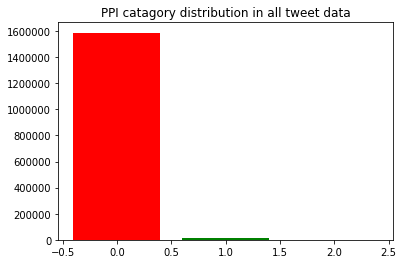

In [71]:
plt.bar(group_PPI.index,group_PPI['Counts'],color="rgb")
plt.title('PPI catagory distribution in all tweet data')
plt.show()

In [72]:
group_PPI_sample = result.groupby('PPI count').count()['tweet']
group_PPI_sample = pd.DataFrame(group_PPI_sample,index=None)
group_PPI_sample = group_PPI_sample.rename(columns={"tweet":"Counts"})
group_PPI_sample.index.rename('PPI category',inplace=True)
group_PPI_sample.head()


,Counts
PPI category,
0,1000
1,1000
2,261


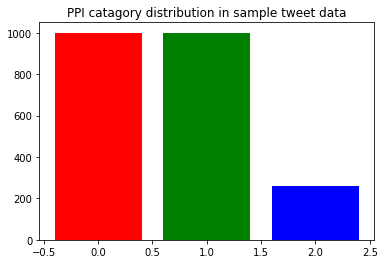

In [73]:
plt.bar(group_PPI_sample.index,group_PPI_sample['Counts'],color="rgb")
plt.title('PPI catagory distribution in sample tweet data')
plt.show()

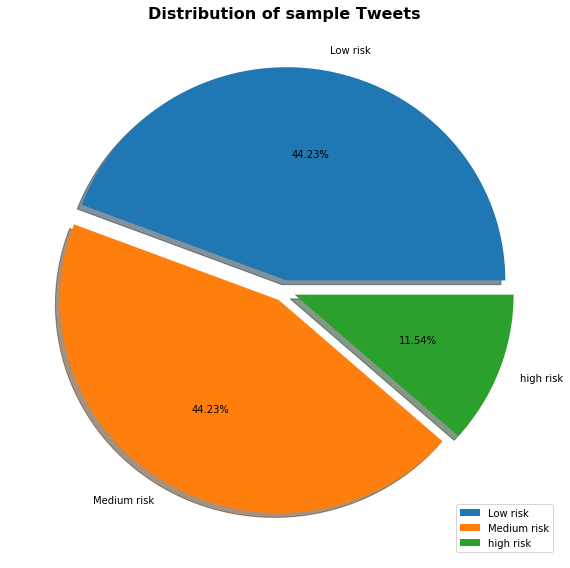

In [74]:
#colors = ["#5CD1FE", "#0AB9FB","#8BDAF9", "#ACE6FD","#000000"]
plt.figure(figsize=(8,8))
plt.title('Distribution of sample Tweets', fontsize=16, fontweight='bold')
explode = (0.05,0.05,0.05)
plt.pie(group_PPI_sample['Counts'],labels=["Low risk","Medium risk","high risk"], startangle = 0,shadow=True,autopct='%1.2f%%',explode=explode)
plt.legend(["Low risk","Medium risk","high risk"], fontsize = 'medium', loc = "best")
plt.tight_layout()
plt.show()

In [161]:
count_df.head()

,Subject,Count
0,Email,584
1,Sexuality,1516
2,Paypal,168
3,Date of birth,924
4,Driver license,25


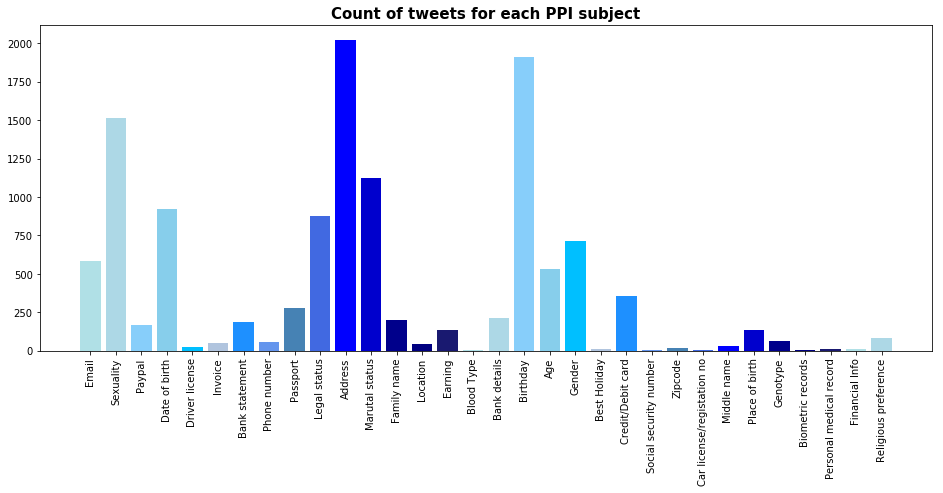

In [171]:
from matplotlib import cm
#colors = cm.hsv(city_D_num /(max(city_D_num)))
#plt.bar(range(len(y)), y, color = colors)
#colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD"]
colors = ["#B0E0E6","#ADD8E6","#87CEFA","#87CEEB","#00BFFF","#B0C4DE","#1E90FF","#6495ED","#4682B4","#4169E1","#0000FF","#0000CD","#00008B","#000080","#191970"]
#x_plot = np.arange(len(city_D_num))
plt.figure(figsize=(16,6))
plt.title('Count of tweets for each PPI subject', fontsize=15, fontweight='bold')
p = plt.bar(count_df['Subject'], count_df['Count'],color = colors)
plt.xticks(count_df['Subject'], rotation = 'vertical')
plt.show()

In [172]:
count_df

,Subject,Count
0,Email,584
1,Sexuality,1516
2,Paypal,168
3,Date of birth,924
4,Driver license,25
5,Invoice,47
6,Bank statement,189
7,Phone number,57
8,Passport,280
9,Legal status,874


# Modeling

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(result['processed_tweet'], result['PPI count'], test_size=0.25, random_state=42)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [78]:
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(1695, 4750)

In [79]:
count_vect.get_feature_names()

['00',
 '000',
 '06',
 '09',
 '090',
 '0range',
 '10',
 '100',
 '1000',
 '100degrees',
 '102',
 '105th',
 '108',
 '10m',
 '10th',
 '11',
 '11000',
 '115',
 '12',
 '120',
 '1200',
 '123',
 '13',
 '1364',
 '13th',
 '14',
 '140conf',
 '15',
 '150',
 '15k',
 '15pm',
 '15th',
 '16',
 '16th',
 '17',
 '18',
 '180',
 '19',
 '1900',
 '1980s',
 '19th',
 '1pm',
 '1st',
 '20',
 '200',
 '2000',
 '2005',
 '2008',
 '2009',
 '21',
 '21st',
 '22',
 '22vanessa',
 '23',
 '236',
 '24',
 '240',
 '245',
 '24hrs',
 '25',
 '25th',
 '27',
 '28',
 '28th',
 '28years',
 '29',
 '29deg',
 '29th',
 '2day',
 '2gether',
 '2morrow',
 '2mos',
 '2nd',
 '2weeks',
 '2x',
 '2yrs',
 '30',
 '303',
 '30am',
 '30th',
 '32',
 '33',
 '333',
 '333333',
 '3377646635',
 '35',
 '350',
 '360',
 '38',
 '388',
 '3gs',
 '3hrs',
 '3oh',
 '3rd',
 '3x',
 '40',
 '40s',
 '416',
 '41am',
 '42',
 '43',
 '45',
 '48',
 '49',
 '4a',
 '4give',
 '4oo66',
 '4th',
 '50',
 '500',
 '530',
 '56pm',
 '5am',
 '5th',
 '60',
 '60in',
 '619',
 '6734',
 '6a',


In [80]:
word_vector = count_vect.inverse_transform(X_train_counts[0])

In [81]:
import numpy as np
sum_xcount=np.array(X_train_counts.sum(axis=0)).reshape(-1)
sum_xcount

array([1, 3, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
#plt.plot(count_vect.get_feature_names(),sum_xcount)
#plt.show()

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1695, 4750)

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, max_iter=5, random_state=42))])

In [85]:
_ = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

0.8674911660777385

In [86]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

0.8041297935103244
{'clf-svm__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [87]:
import nltk

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_clf_svm = Pipeline([('vect', stemmed_count_vect),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, max_iter=5, random_state=42))])
text_clf_svm = text_clf_svm.fit(X_train, y_train)

predicted_text_clf_svm = text_clf_svm.predict(X_test)

np.mean(predicted_text_clf_svm == y_test)

0.8533568904593639

In [88]:
predicted_PPI = text_clf_svm.predict(result['processed_tweet'])

In [89]:
result['predicted']=predicted_PPI

In [90]:
result.tail()

,name,tweet,processed_tweet,PPI count,predicted
1558578,DanielaVelasco,aWw 2Day i'm So happy! yayyy! Erick Happy B-D...,aww 2day i ' m so happy ! yayyy ! erick happy ...,2,1
1566385,Ohh_itsKat,Shopping was a success. Not so much success wi...,shopping was a success . not so much success w...,2,2
1574745,mouffette,My bank account hasn't been this low in YEARS....,my bank account hasn ' t been this low in year...,2,2
1588849,waxercat,"@MarloPerry no.. as a male, i can confirm it. ...","no .. as a male , i can confirm it . n . o . a...",2,1
1598861,SianySianySiany,So it turns out my bank card doesn't work here...,so it turns out my bank card doesn ' t work he...,2,2


### Confusion Matrix

Confusion matrix, without normalization
[[245  15   1]
 [ 51 200   1]
 [  1  14  38]]
Normalized confusion matrix
[[0.94 0.06 0.  ]
 [0.2  0.79 0.  ]
 [0.02 0.26 0.72]]


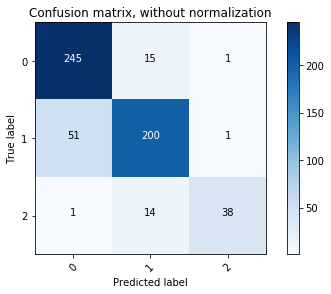

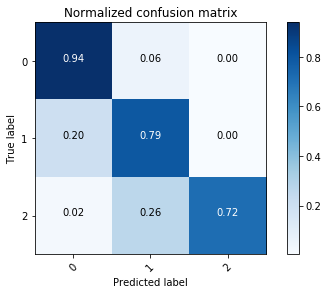

In [91]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_text_clf_svm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1,2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Appling grid search for optimize parameter (Optional)

In [92]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50, 80),
}


In [93]:
from time import time
# multiprocessing requires the fork to happen in a __main__ protected
# block

# find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
t0 = time()
grid_search.fit(result['processed_tweet'], result['PPI count'])
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.75, 1.0), 'vect__max_features': (None, 5000, 10000, 50000), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet'), 'clf__max_iter': (10, 50, 80)}
Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  7.0min finished


done in 417.694s

Best score: 0.839
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 50
	clf__penalty: 'elasticnet'
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__max_df: 0.75
	vect__max_features: None
	vect__ngram_range: (1, 2)


In [94]:
result.head()

,name,tweet,processed_tweet,PPI count,predicted
1268879,tibbon,"I always wanted to be a rock star, but I dunno...","i always wanted to be a rock star , but i dunn...",0,0
238063,jomags,i really hate rainy days bring back the sun!,i really hate rainy days bring back the sun !,0,0
614246,Starlicht,@xEviie lol yeah. Like the talk shows are good...,lol yeah . like the talk shows are good . it '...,0,0
232927,illogical,Handled my first H1N1 spec. I was waiting for ...,handled my first h1n1 spec . i was waiting for...,0,0
308179,springtimelove,crap. i just remembered tristan is getting his...,crap . i just remembered tristan is getting hi...,0,0
